## Notebook 1 of 3
## Capstone Project - Predicting Movie Ratings for IMDB
## April 12, 2021

## Halak Desai

### Data Cleaning and EDA

I have been always curious to know `'WHY'` a decision was made and `'WHAT'` information supported it.

I like watching movies as most people do. I get recommendations on my subscription service all the time.   
I observed that whenever I get a recommendation, I would immidiately search for its ratings and reviews.

This got me thinking about what drives these ratings and to take it a step further, **What if I can Predict a Rating!**  
This would help predict a rating of a movie given set features, and could be helpful to the investors, casting crew, producer, writers, etc when creating a movie!

So I went datahunting. After looking at several different data sets I decided on using ImDb movie dataset from `Kaggle.com`
This data set had very rich information especially for the Ratings.

I want to first explore data and then based on my intial analysis I will determine if I want to use linear or logistic regression.

I am going to start this notebook by importing required libraries for my Data cleaning and EDA activities.  
I am going to download csv files which have been procured from Kaggle website.
This dataset contains information of movies and its ratings by ImDb service users.
There are 4 csv files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load and Read the data

In [2]:
movie = pd.read_csv('Original_Data\IMDb movies.csv')
names = pd.read_csv('Original_Data\IMDb names.csv')
votes = pd.read_csv('Original_Data\IMDb ratings.csv')
tp = pd.read_csv('Original_Data\IMDb title_principals.csv')

C:\Users\halak\anaconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Data Dictionary

### movie Dataframe:
1. `imdb_title_id` = Unique title of a movie assigned by imdb
2. `title` = movie title, could be in different language adapted from a movie from another country or language
3. `original_title` = original movie title
4. `year` = year movie was released
5. `date_pubished` = released date of the movie
6. `genre` = genres the movie is tagged to.
7. `duration` = run-time of the movie
8. `country` = country where movie belongs to or produced/released
9. `language` = language of the movie
10. `director` = movie director
11. `actors` = actors in a movie
12. `writer` = writers of the movie
13. `production_company` = company or production house producing the movie
14. `description` = description of the movie
15. `avg_vote` = weighted average vote
16. `votes` = total number of votes for each movie
17. `budget` = budget of the movie
18. `usa_gross_income` = income of the movie in USA
19. `worlwide_gross_income` = income of the movie from all over the world
20. `metascore` = weighted average of many reviews coming from reputed critics
21. `reviews_from_users` = Number of reviews given by a user to a movie
22. `reviews_from_critics` = Number of reviews given by a critic to a movie

In [3]:
movie.head().T

,0,1,2,3,4
imdb_title_id,tt0000009,tt0000574,tt0001892,tt0002101,tt0002130
title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno
original_title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno
year,1894,1906,1911,1912,1911
date_published,1894-10-09,1906-12-26,1911-08-19,1912-11-13,1911-03-06
genre,Romance,"Biography, Crime, Drama",Drama,"Drama, History","Adventure, Drama, Fantasy"
duration,45,70,53,100,68
country,USA,Australia,"Germany, Denmark",USA,Italy
language,None,None,NaN,English,Italian
director,Alexander Black,Charles Tait,Urban Gad,Charles L. Gaskill,"Francesco Bertolini, Adolfo Padovan"


### names Dataframe:

1. `imdb_name_id'` = name id for actors/directors/writers 
2. `name` = name of the person 
3. `birth_name`	= birth name of the person
4. `height`	= height
5. `bio	birth_details` = birth details of where the person
6. `date_of_birth`	= birthdate 
7. `place_of_birth` = place of birth
8. `death_details`	= death information
9. `date_of_death`	= date of death
10. `place_of_death` = place of death
11. `reason_of_death` = reason of death	
12. `spouses_string` =number of spouses
13. `spouses divorces` = number of divorces
14. `spouses_with_children`	= number of spouses who had children
15. `children` = number of children

In [4]:
names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


### votes Dataframe:

Ratings and Votes information is present in this data for different demographics. Vote_0 to Vote_9 columns represent the number of votes for ratings from 0 to 9.
Weighted average Rating is the column for our Target.

I am going to pick few columns to get some insight and voting patterns.

In [5]:
votes.head().T

,0,1,2,3,4
imdb_title_id,tt0000009,tt0000574,tt0001892,tt0002101,tt0002130
weighted_average_vote,5.9,6.1,5.8,5.2,7.0
total_votes,154,589,188,446,2237
mean_vote,5.9,6.3,6.0,5.3,6.9
median_vote,6.0,6.0,6.0,5.0,7.0
votes_10,12,57,6,15,210
votes_9,4,18,6,8,225
votes_8,10,58,17,16,436
votes_7,43,137,44,62,641
votes_6,28,139,52,98,344


### tp Dataframe:
This data frrame contains information on key players like actors, directors, writers, producers, etc in the category column for each movie. Job contains the description of the movie and or category

In [6]:
tp.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


Creating function to check Null Values and print columns which have are have nulls values only

In [7]:
tp['category'].unique()

array(['actress', 'actor', 'director', 'producer', 'composer',
       'cinematographer', 'writer', 'production_designer', 'editor',
       'archive_footage', 'self', 'archive_sound'], dtype=object)

In [8]:
# definition made to check null values, as we are going to use this very frequently.

def show_nulls(the_df):
    null_count = the_df.isna().mean()*100 # % Null Values
    print(null_count[null_count > 0]) # print columns with null values

### Data Cleaning
**I am going to start check for null values, duplicates keep relevant columns and impute any data if needed for all 4 data files**

In [9]:
show_nulls(movie)

country                   0.074544
language                  0.970241
director                  0.101334
writer                    1.830994
production_company        5.188981
actors                    0.080368
description               2.463456
budget                   72.383670
usa_gross_income         82.148972
worlwide_gross_income    63.873974
metascore                84.502941
reviews_from_users        8.848640
reviews_from_critics     13.740609
dtype: float64


In [10]:
#Check for duplicates

movie.duplicated().sum()

0

I see that budget, usa_gross_income, worlwide_gross_income, metascore has more than 50% null values. After searching more, I could not find enough data for the missing values. There was no way to impute any data into these columns. Hence I have decided to drop this columns.    

I am going to check if I can impute some values from tp dataframe for missing writers


In [11]:
writer = movie[movie['writer'].isna()]
writer.shape

(1572, 22)

In [12]:
writer1 = writer.merge(tp, on ='imdb_title_id' )

In [13]:
writer1[writer1['category'] == 'writer'].shape

(75, 27)

As observed I can only impute 75 rows from missing 1572 rows. Hence I am going to drop writer column as well.  
I also dont need number of reviews from users and critics, production company and description of the movie either.  
Hence in the next line, I am going to drop all non-required information


In [14]:
movie.drop(['budget', 'usa_gross_income','worlwide_gross_income','metascore','reviews_from_users','writer','reviews_from_critics','description','production_company'], axis = 1, inplace = True)

In [15]:
movie.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,avg_vote,votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,188
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2237


In [16]:
movie.shape

(85855, 13)

I wanted to see relationship between original title and title

In [17]:
movie[movie.duplicated(subset=['original_title'],keep=False)]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,avg_vote,votes
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446
9,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane","Robert Gemp, Frederick Warde, Albert Gardner, ...",5.5,225
10,tt0002646,Atlantis,Atlantis,1913,1913-12-26,Drama,121,Denmark,Danish,August Blom,"Olaf Fønss, Ida Orloff, Ebba Thomsen, Carl Lau...",6.6,331
18,tt0003419,Lo studente di Praga,Der Student von Prag,1913,1913-08-22,"Drama, Fantasy, Horror",85,Germany,"German, English","Paul Wegener, Stellan Rye","Paul Wegener, Grete Berger, Lyda Salmonova, Jo...",6.5,1768
20,tt0003489,Gli ultimi giorni di Pompei,Gli ultimi giorni di Pompei,1913,1913-08-24,"Adventure, Drama",88,Italy,Italian,"Mario Caserini, Eleuterio Rodolfi","Fernanda Negri Pouget, Eugenia Tettoni Fior, U...",6.2,474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85784,tt9820352,Villain,Villain,2020,2020-02-28,"Action, Crime, Drama",97,UK,English,Philip Barantini,"Craig Fairbrass, Robert Glenister, George Russ...",5.7,649
85802,tt9845110,Deux,Deux,2019,2020-02-12,"Comedy, Drama",99,"France, Luxembourg, Belgium","French, German",Filippo Meneghetti,"Barbara Sukowa, Martine Chevallier, Léa Drucke...",7.2,434
85813,tt9861522,Ali,Ali,2019,2019-03-22,Drama,110,Turkey,Turkish,Ramazan Özer,"Gürbey Ileri, Hakan Meriçliler, Semra Dinçer, ...",4.8,126
85820,tt9875852,Domovoy,Domovoy,2019,2019-04-11,"Comedy, Family, Fantasy",90,Russia,Russian,Evgeniy Bedarev,"Anastasiya Abadzhidi, Dmitriy Bedarev, Dmitriy...",5.1,168


In [18]:
movie[movie['original_title'] == 'Gli ultimi giorni di Pompei']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,avg_vote,votes
20,tt0003489,Gli ultimi giorni di Pompei,Gli ultimi giorni di Pompei,1913,1913-08-24,"Adventure, Drama",88,Italy,Italian,"Mario Caserini, Eleuterio Rodolfi","Fernanda Negri Pouget, Eugenia Tettoni Fior, U...",6.2,474
10549,tt0054422,Gli ultimi giorni di Pompei,Gli ultimi giorni di Pompei,1959,1959-11-12,"Action, Adventure, History",100,"Italy, Spain, West Germany, Monaco","English, Italian, German",Mario Bonnard,"Steve Reeves, Christine Kaufmann, Fernando Rey...",5.7,1030


What I found was that those movies whuch had duplicate titles, were movies translated from another language or a remake of an older movie withthe same name as seen above

Next in the process was clearing out the number of countries

In [19]:
movie['country'].unique().shape

(4908,)

Here I can see that there are 4908 unique entries of single country or some combination. Below is the list of countrie and the number of movies from that country.

In [20]:
movie['country'].value_counts()

USA                                 28511
India                                6065
UK                                   4111
Japan                                3077
France                               3055
                                    ...  
Belgium, Netherlands, Bulgaria          1
Norway, Sweden, Denmark, Germany        1
Romania, Moldova, Luxembourg            1
USA, Taiwan                             1
Poland, France, Hungary                 1
Name: country, Length: 4907, dtype: int64

As we can see that majority of movies are from USA, I decided to convert all other countries into "Other" category.  
I am going to map any row in the column containg USA to be "USA"

In [21]:
# Find number of rows containing USA

movie['country'].str.contains("USA").value_counts()

False    51466
True     34325
Name: country, dtype: int64

In [22]:
# Find and replace values in the columns containing USA and convert to "USA"

movie['country'] = movie.country.str.replace(r'(^.*USA.*$)', 'USA')

C:\Users\halak\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# Find and replace values in the columns containing Not USA and convert to "Other"

movie.loc[movie.country != 'USA', 'country'] = 'Other'

In [24]:
# Find and keep values containing English in language column and containing not English as "Other"

movie.loc[movie.language != 'English', 'language'] = 'Other'

Let us check dataframe again

In [25]:
movie.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,avg_vote,votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,Other,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Other,Other,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,Other,Other,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,188
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Other,Other,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2237


In [26]:
# Let us check distribution of the changed columns

movie['country'].value_counts()
movie['country'].value_counts()/movie.shape[0]*100

Other    60.019801
USA      39.980199
Name: country, dtype: float64

In [27]:
# Let us check distribution of the changed columns

movie['language'].value_counts()
movie['language'].value_counts()/movie.shape[0]*100

Other      58.139887
English    41.860113
Name: language, dtype: float64

In [28]:
# Let us check on our null values after processing

show_nulls(movie)

director    0.101334
actors      0.080368
dtype: float64


I am going to tackle these null values later in the notebook, to reduce data loss

In [29]:
movie.dtypes

imdb_title_id      object
title              object
original_title     object
year               object
date_published     object
genre              object
duration            int64
country            object
language           object
director           object
actors             object
avg_vote          float64
votes               int64
dtype: object

In [30]:
# Let us check for any irregularities in the column
movie['year'].unique()

array([1894, 1906, 1911, 1912, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1932, 1931, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020, '2012', '2015', '2009', '2013', '2018', '2014', '2017',
       '2011', '2016', '1981', '1975', '2010', '1984', '2007', '2006',
       '2001', '2004', '1979', '2019', '1967', '1978', '2003', '2005',
       '1969', '1990', '1983', '2002', '1996', '2008'

In [31]:
# I am going to see the row where 'TV Movie 2019' is a string to number.

movie[movie['year'] == 'TV Movie 2019']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,avg_vote,votes
83917,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,"Hugh Jackman, Ray Romano, Welker White, Alliso...",7.1,23973


In [32]:
# As we can see date published has the same string problem, I am going tp convert them both.

movie.loc[movie.year == 'TV Movie 2019', 'year'] = '2019'
movie.loc[movie.date_published == 'TV Movie 2019', 'date_published'] = '2019-01-01'

In [33]:
# Now the year is ready to be converted to Integer and datepublished to datetime

movie['year'] = movie['year'].astype('int')
movie['date_published'] = pd.to_datetime(movie['date_published'])

In [34]:
# Now extract year, month and day out of the column date published

movie['published_month'] = movie['date_published'].dt.month_name()
movie['published_day'] = movie['date_published'].dt.day_name()

In [35]:
movie.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,avg_vote,votes,published_month,published_day
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,Other,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154,October,Tuesday
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Other,Other,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589,December,Wednesday
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,Other,Other,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,188,August,Saturday
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446,November,Wednesday
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Other,Other,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2237,March,Monday


In [36]:
movie.describe().T

,count,mean,std,min,25%,50%,75%,max
year,85855.0,1993.500891,24.216420,1894.0,1979.0,2003.0,2013.0,2020.0
duration,85855.0,100.351418,22.553848,41.0,88.0,96.0,108.0,808.0
avg_vote,85855.0,5.898656,1.234987,1.0,5.2,6.1,6.8,9.9
votes,85855.0,9493.489605,53574.359543,99.0,205.0,484.0,1766.5,2278845.0


## Lets clean up the names csv

In [37]:
names.head().T

,0,1,2,3,4
imdb_name_id,nm0000001,nm0000002,nm0000003,nm0000004,nm0000005
name,Fred Astaire,Lauren Bacall,Brigitte Bardot,John Belushi,Ingmar Bergman
birth_name,Frederic Austerlitz Jr.,Betty Joan Perske,Brigitte Bardot,John Adam Belushi,Ernst Ingmar Bergman
height,177.0,174.0,166.0,170.0,179.0
bio,"Fred Astaire was born in Omaha, Nebraska, to J...",Lauren Bacall was born Betty Joan Perske on Se...,"Brigitte Bardot was born on September 28, 1934...","John Belushi was born in Chicago, Illinois, US...","Ernst Ingmar Bergman was born July 14, 1918, t..."
birth_details,"May 10, 1899 in Omaha, Nebraska, USA","September 16, 1924 in The Bronx, New York City...","September 28, 1934 in Paris, France","January 24, 1949 in Chicago, Illinois, USA","July 14, 1918 in Uppsala, Uppsala län, Sweden"
date_of_birth,1899-05-10,1924-09-16,1934-09-28,1949-01-24,1918-07-14
place_of_birth,"Omaha, Nebraska, USA","The Bronx, New York City, New York, USA","Paris, France","Chicago, Illinois, USA","Uppsala, Uppsala län, Sweden"
death_details,"June 22, 1987 in Los Angeles, California, USA ...","August 12, 2014 in New York City, New York, US...",NaN,"March 5, 1982 in Hollywood, Los Angeles, Calif...","July 30, 2007 in Fårö, Gotlands län, Sweden (..."
date_of_death,1987-06-22,2014-08-12,NaN,1982-03-05,2007-07-30


In [38]:
show_nulls(names)

height             84.991518
bio                31.241330
birth_details      62.845098
date_of_birth      62.845098
place_of_birth     65.068776
death_details      86.586386
date_of_death      86.586386
place_of_death     87.558825
reason_of_death    92.377018
spouses_string     84.766128
dtype: float64


In [39]:
names.shape

(297705, 17)

I am not going to use this data in my final dataframe, hence I am going to leave this as it is for now.

## Lets clean up Votes csv

In [40]:
votes.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [41]:
votes.shape

(85855, 49)

In [42]:
movie.shape

(85855, 15)

In [43]:
#Checking for some primary statistics

votes.describe()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,85855.000000,8.585500e+04,85855.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,...,84911.000000,84911.000000,83057.000000,83057.000000,85176.000000,85176.000000,85646.000000,85646.000000,85854.000000,85854.000000
mean,5.898656,9.493490e+03,6.226342,6.267853,1.216158e+03,1196.774608,2040.896337,2105.668371,1353.192802,700.291177,...,6.071223,685.655451,6.022226,196.065341,5.155706,76.110231,5.925910,1647.822537,5.749638,4332.940865
std,1.234987,5.357436e+04,1.155280,1.481168,1.245582e+04,11735.363316,13801.122865,10699.375191,5976.801303,2931.301270,...,1.454370,3732.376186,1.541895,842.979585,1.290920,124.264020,1.308087,8455.978158,1.285570,23243.807279
min,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.200000,2.050000e+02,5.600000,6.000000,2.100000e+01,8.000000,18.000000,28.000000,30.000000,22.000000,...,5.300000,10.000000,5.200000,6.000000,4.400000,11.000000,5.200000,24.000000,5.000000,95.000000
50%,6.100000,4.840000e+02,6.400000,6.000000,5.100000e+01,24.000000,49.000000,77.000000,76.000000,53.000000,...,6.300000,27.000000,6.200000,16.000000,5.300000,29.000000,6.100000,81.000000,6.000000,225.000000
75%,6.800000,1.766500e+03,7.000000,7.000000,1.920000e+02,111.500000,234.000000,342.000000,290.000000,178.000000,...,7.000000,109.000000,7.000000,62.000000,6.000000,77.000000,6.800000,335.000000,6.700000,841.000000
max,9.900000,2.278845e+06,9.800000,10.000000,1.259076e+06,629582.000000,418070.000000,241832.000000,145740.000000,78385.000000,...,10.000000,129249.000000,10.000000,34317.000000,10.000000,928.000000,10.000000,348363.000000,10.000000,887226.000000


In [44]:
# Check for null values
show_nulls(votes)

allgenders_0age_avg_vote     61.144954
allgenders_0age_votes        61.144954
allgenders_18age_avg_vote     0.822317
allgenders_18age_votes        0.822317
allgenders_30age_avg_vote     0.011648
allgenders_30age_votes        0.011648
allgenders_45age_avg_vote     0.093180
allgenders_45age_votes        0.093180
males_allages_avg_vote        0.001165
males_allages_votes           0.001165
males_0age_avg_vote          68.072914
males_0age_votes             68.072914
males_18age_avg_vote          1.706365
males_18age_votes             1.706365
males_30age_avg_vote          0.013977
males_30age_votes             0.013977
males_45age_avg_vote          0.117640
males_45age_votes             0.117640
females_allages_avg_vote      0.094345
females_allages_votes         0.094345
females_0age_avg_vote        74.239124
females_0age_votes           74.239124
females_18age_avg_vote        7.595364
females_18age_votes           7.595364
females_30age_avg_vote        1.099528
females_30age_votes      

I am not going to clean up rows before I merge the data frames, to minimize loss of data.

I am going to keep only weighted average votes, males, females, US voter and non-us voters information.
I am also going to do weighted average for males, females and us and non us voters as they are not weighted currently to be a fair comparison.
I am going to use formula than ImdB uses to calculate their weighted average.  
*(IMDb doesnot share exact formula of how they calculate, this is an approximation provided)*

$$wr = (v/(v+m)) R + (m/(m+v))C$$ 
 
where

v = number of votes on the movie

m = minimum number of votes (currently 1000 votes set by imdb)

R = average/mean rating for the movie

C = mean rating across whole dataset (**see below to check for means for columns in that need to be weighted**)

Thus, we will calculate these weighted averages and replace the relevant columns.



In [45]:
votes = votes[['imdb_title_id','weighted_average_vote','total_votes','mean_vote','median_vote','males_allages_avg_vote','males_allages_votes',
       'females_allages_avg_vote','females_allages_votes','us_voters_rating','us_voters_votes','non_us_voters_rating','non_us_voters_votes']]

In [46]:
# Check for null values

show_nulls(votes)

males_allages_avg_vote      0.001165
males_allages_votes         0.001165
females_allages_avg_vote    0.094345
females_allages_votes       0.094345
us_voters_rating            0.243434
us_voters_votes             0.243434
non_us_voters_rating        0.001165
non_us_voters_votes         0.001165
dtype: float64


In [47]:
# Finding the means of all the columns for which I need to get weighted average

votes[['males_allages_avg_vote','females_allages_avg_vote','us_voters_rating','non_us_voters_rating']].mean()

males_allages_avg_vote      5.817172
females_allages_avg_vote    6.039408
us_voters_rating            5.925910
non_us_voters_rating        5.749638
dtype: float64

In [48]:
#wr = ((row[number]/(row[number]+1000))*row[avg]) + ((1000/(row[number]+1000))*avg of the column for the whole dataset)

In [49]:
votes['weighted_us_voters_rating'] = ((votes['us_voters_votes']/(votes['us_voters_votes']+1000))*votes['us_voters_rating']) + ((1000/(votes['us_voters_votes']+1000))*5.9)
votes['weighted_non_us_voters_rating'] = ((votes['non_us_voters_votes']/(votes['non_us_voters_votes']+1000))*votes['non_us_voters_rating']) + ((1000/(votes['non_us_voters_votes']+1000))*5.7)
votes['weighted_males_allages_rating'] = ((votes['males_allages_votes']/(votes['males_allages_votes']+1000))*votes['males_allages_avg_vote']) + ((1000/(votes['males_allages_votes']+1000))*5.8)
votes['weighted_females_allages_rating'] = ((votes['females_allages_votes']/(votes['females_allages_votes']+1000))*votes['females_allages_avg_vote']) + ((1000/(votes['females_allages_votes']+1000))*6.0)

In [50]:
votes

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
0,tt0000009,5.9,154,5.9,6.0,6.2,97.0,6.0,35.0,6.4,51.0,6.0,70.0,5.924263,5.719626,5.835369,6.000000
1,tt0000574,6.1,589,6.3,6.0,6.1,425.0,6.2,50.0,6.0,96.0,6.2,331.0,5.908759,5.824343,5.889474,6.009524
2,tt0001892,5.8,188,6.0,6.0,5.9,146.0,5.7,15.0,6.2,31.0,5.9,123.0,5.909020,5.721906,5.812740,5.995567
3,tt0002101,5.2,446,5.3,5.0,5.1,299.0,5.9,39.0,5.5,207.0,4.7,105.0,5.831400,5.604977,5.638876,5.996246
4,tt0002130,7.0,2237,6.9,7.0,7.0,1607.0,7.2,215.0,7.0,488.0,7.0,1166.0,6.260753,6.399815,6.539701,6.212346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,5.3,398,5.5,6.0,5.3,267.0,6.0,26.0,6.3,22.0,5.3,214.0,5.908611,5.629489,5.694633,6.000000
85851,tt9911196,7.7,724,7.9,8.0,7.8,412.0,7.6,109.0,6.8,13.0,7.7,388.0,5.911550,6.259078,6.383569,6.157259
85852,tt9911774,7.9,265,7.8,8.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,5.692615,5.800797,NaN
85853,tt9914286,6.4,194,9.4,10.0,3.1,10.0,4.0,2.0,1.7,5.0,5.8,5.0,5.879104,5.700498,5.773267,5.996008


In [51]:
# Now I am going to drop the columns which are not weighted and number of votes 

votes.drop(['total_votes','median_vote','males_allages_avg_vote','males_allages_votes',
       'females_allages_avg_vote','females_allages_votes','us_voters_rating','us_voters_votes','non_us_voters_rating','non_us_voters_votes'], axis =1, inplace = True)

### World DataFrame

Now I am going to merge movie table with votes table on the primary key of imbd_title_id and name it `world_df`

In [52]:
world_df = movie.merge(votes, on = 'imdb_title_id')

In [53]:
world_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,Other,Alexander Black,...,5.9,154,October,Tuesday,5.9,5.9,5.924263,5.719626,5.835369,6.000000
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Other,Other,Charles Tait,...,6.1,589,December,Wednesday,6.1,6.3,5.908759,5.824343,5.889474,6.009524
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,Other,Other,Urban Gad,...,5.8,188,August,Saturday,5.8,6.0,5.909020,5.721906,5.812740,5.995567
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,November,Wednesday,5.2,5.3,5.831400,5.604977,5.638876,5.996246
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Other,Other,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,March,Monday,7.0,6.9,6.260753,6.399815,6.539701,6.212346


In [54]:
#Shape of the new dataframe

world_df.shape

(85855, 21)

In [55]:
#Check for null values

show_nulls(world_df)

director                           0.101334
actors                             0.080368
weighted_us_voters_rating          0.243434
weighted_non_us_voters_rating      0.001165
weighted_males_allages_rating      0.001165
weighted_females_allages_rating    0.094345
dtype: float64


**Checking for any common Nan values**  

I am going to check the column where there are most null Values, i.e. `weighted_us_voters_rating`

In [56]:
wdf = world_df[(world_df['weighted_us_voters_rating'].isna())]
wdf.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
4265,tt0035131,Non ti pago!,Non ti pago!,1942,1942-10-07,Comedy,72,Other,Other,Carlo Ludovico Bragaglia,...,7.1,113,October,Wednesday,7.1,7.3,NaN,5.780538,5.882424,6.008920
6923,tt0043777,"Mamma mia, che impressione!","Mamma mia, che impressione!",1951,1951-01-01,Comedy,75,Other,Other,Roberto Savarese,...,6.0,112,January,Monday,6.0,6.3,NaN,5.721965,5.814299,6.001992
7702,tt0046172,Pekka Puupää,Pekka Puupää,1953,1953-04-30,Comedy,71,Other,Other,Ville Salminen,...,5.6,274,April,Thursday,5.6,5.9,NaN,5.683264,5.783752,5.980488
7703,tt0046173,Pekka Puupää kesälaitumilla,Pekka Puupää kesälaitumilla,1953,1953-10-16,Comedy,90,Other,Other,Armand Lohikoski,...,5.9,247,October,Friday,5.9,6.1,NaN,5.700000,5.800000,5.991389
8408,tt0048334,El malvado Carabel,El malvado Carabel,1956,1955-12-15,Comedy,81,Other,Other,Fernando Fernán Gómez,...,6.5,108,December,Thursday,6.5,6.6,NaN,5.758573,5.850649,6.003984


I am going to take out rows stepwise.

In [57]:
# drop rows that are null

world_df = world_df[world_df['weighted_us_voters_rating'].notna()]

In [58]:
world_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,Other,Alexander Black,...,5.9,154,October,Tuesday,5.9,5.9,5.924263,5.719626,5.835369,6.000000
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Other,Other,Charles Tait,...,6.1,589,December,Wednesday,6.1,6.3,5.908759,5.824343,5.889474,6.009524
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,Other,Other,Urban Gad,...,5.8,188,August,Saturday,5.8,6.0,5.909020,5.721906,5.812740,5.995567
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,November,Wednesday,5.2,5.3,5.831400,5.604977,5.638876,5.996246
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Other,Other,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,March,Monday,7.0,6.9,6.260753,6.399815,6.539701,6.212346


In [59]:
#Check for nulls again. I see that this did get some null values out from other columns but still left with some.
show_nulls(world_df)

director                           0.098078
actors                             0.080564
weighted_non_us_voters_rating      0.001168
weighted_females_allages_rating    0.087570
dtype: float64


In [60]:
# Now I am going take out all the null value rows as they are less than 1% and I am not going to lose a lot of data.

world_df1 = world_df[world_df['director'].notna() & world_df['actors'].notna() & world_df['weighted_females_allages_rating'].notna() & world_df['weighted_non_us_voters_rating'].notna()] 
world_df1.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,Other,Alexander Black,...,5.9,154,October,Tuesday,5.9,5.9,5.924263,5.719626,5.835369,6.000000
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Other,Other,Charles Tait,...,6.1,589,December,Wednesday,6.1,6.3,5.908759,5.824343,5.889474,6.009524
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,Other,Other,Urban Gad,...,5.8,188,August,Saturday,5.8,6.0,5.909020,5.721906,5.812740,5.995567
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,November,Wednesday,5.2,5.3,5.831400,5.604977,5.638876,5.996246
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Other,Other,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,March,Monday,7.0,6.9,6.260753,6.399815,6.539701,6.212346


In [61]:
# Check for nulls

show_nulls(world_df1)

Series([], dtype: float64)


**I can see that now we donot have any null values!**

In [62]:
# Original Data size

movie.shape

(85855, 15)

In [63]:
# New Data Size

world_df1.shape

(85431, 21)

In [64]:
# Lost data

85855-85431

424

In [65]:
round(((424/85855)*100), 3)

0.494

So I am down by 423 rows which is 0.424% of total dataset after cleaning up the null values.
I deleted all null values. 


**So I only lost total of 0.5% of data!**

In [66]:
# I am going to check for dtypes again for my merged dataframe

world_df1.dtypes

imdb_title_id                              object
title                                      object
original_title                             object
year                                        int32
date_published                     datetime64[ns]
genre                                      object
duration                                    int64
country                                    object
language                                   object
director                                   object
actors                                     object
avg_vote                                  float64
votes                                       int64
published_month                            object
published_day                              object
weighted_average_vote                     float64
mean_vote                                 float64
weighted_us_voters_rating                 float64
weighted_non_us_voters_rating             float64
weighted_males_allages_rating             float64


In [67]:
world_df1.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,Other,Alexander Black,...,5.9,154,October,Tuesday,5.9,5.9,5.924263,5.719626,5.835369,6.000000
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Other,Other,Charles Tait,...,6.1,589,December,Wednesday,6.1,6.3,5.908759,5.824343,5.889474,6.009524
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,Other,Other,Urban Gad,...,5.8,188,August,Saturday,5.8,6.0,5.909020,5.721906,5.812740,5.995567
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,November,Wednesday,5.2,5.3,5.831400,5.604977,5.638876,5.996246
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Other,Other,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,March,Monday,7.0,6.9,6.260753,6.399815,6.539701,6.212346


In [68]:
#I am going to reset index after merge and droping rows

world_df1.reset_index(drop = True, inplace = True)

In [69]:
world_df1.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,Other,Alexander Black,...,5.9,154,October,Tuesday,5.9,5.9,5.924263,5.719626,5.835369,6.000000
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Other,Other,Charles Tait,...,6.1,589,December,Wednesday,6.1,6.3,5.908759,5.824343,5.889474,6.009524
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,Other,Other,Urban Gad,...,5.8,188,August,Saturday,5.8,6.0,5.909020,5.721906,5.812740,5.995567
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,November,Wednesday,5.2,5.3,5.831400,5.604977,5.638876,5.996246
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Other,Other,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,March,Monday,7.0,6.9,6.260753,6.399815,6.539701,6.212346


I am going to drop avg votes and votes column as they are the same as the weighted average votes

In [70]:
world_df1.drop(['avg_vote'], axis = 1, inplace = True)

C:\Users\halak\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
show_nulls(world_df1)

Series([], dtype: float64)


In [72]:
world_df1.dtypes

imdb_title_id                              object
title                                      object
original_title                             object
year                                        int32
date_published                     datetime64[ns]
genre                                      object
duration                                    int64
country                                    object
language                                   object
director                                   object
actors                                     object
votes                                       int64
published_month                            object
published_day                              object
weighted_average_vote                     float64
mean_vote                                 float64
weighted_us_voters_rating                 float64
weighted_non_us_voters_rating             float64
weighted_males_allages_rating             float64
weighted_females_allages_rating           float64


## Primary Visualisations and insights

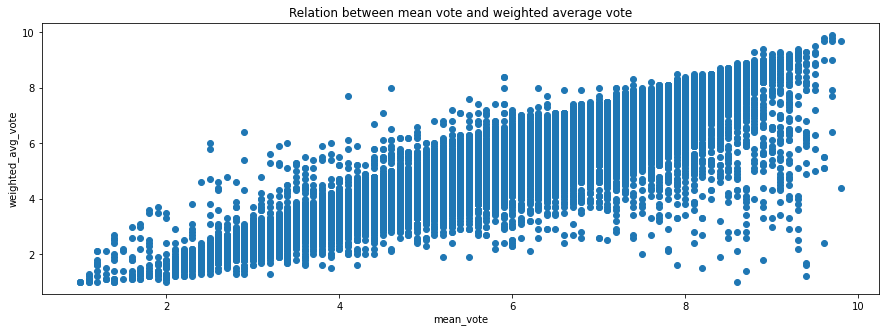

In [73]:
plt.figure(figsize = (15,5))
plt.scatter(x = world_df1['mean_vote'], y = world_df1['weighted_average_vote'])
plt.xlabel('mean_vote')
plt.ylabel('weighted_avg_vote')
plt.title('Relation between mean vote and weighted average vote')
plt.show()

I can see that there are some high mean votes but lower weighted average vote. Which means that though mean votes are higher, there are very few number of votes for that movie. Hence truly mean vote doesnot represent a true average rating.
Hence now on I will be using `weighted_avg_vote` for all my insights

### Weighted Avg Vote by Year

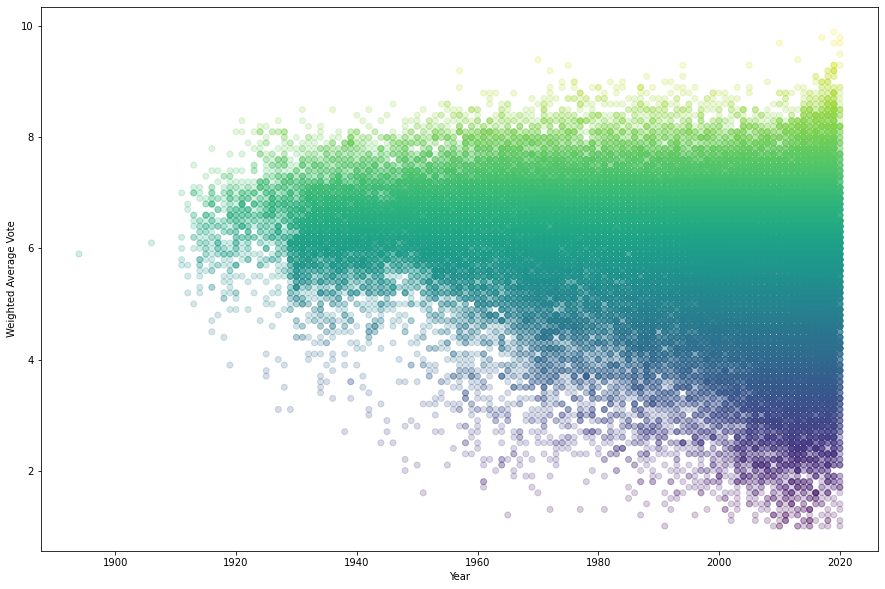

In [74]:
plt.figure(figsize = (15,10))
plt.scatter(x = world_df1['year'], y = world_df1['weighted_average_vote'], alpha=0.2, c = world_df1['weighted_average_vote'])
plt.xlabel('Year')
plt.ylabel('Weighted Average Vote')
plt.show()

This is an interesting insight. This shows that variance in movie ratings have increased during years.

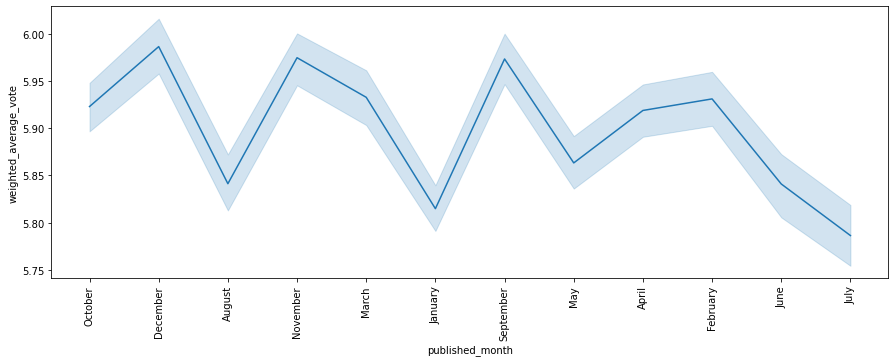

In [75]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=world_df1, x = 'published_month', y = 'weighted_average_vote',ax = ax)
plt.setp(ax.get_xticklabels(), rotation=90);

Looks like movies released in December, November, September have done better in terms of rating.   
Where as movies released August, January, May have not done as well as other months.

<AxesSubplot:xlabel='published_day', ylabel='weighted_average_vote'>

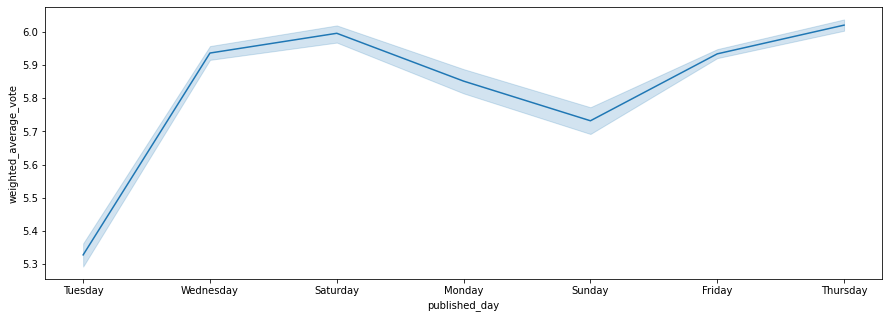

In [76]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=world_df1, x = 'published_day', y = 'weighted_average_vote',ax = ax)

This is an interesting plot showing that movies released on Sunday and Tuesday didn't score more ratings than on other days of the week.

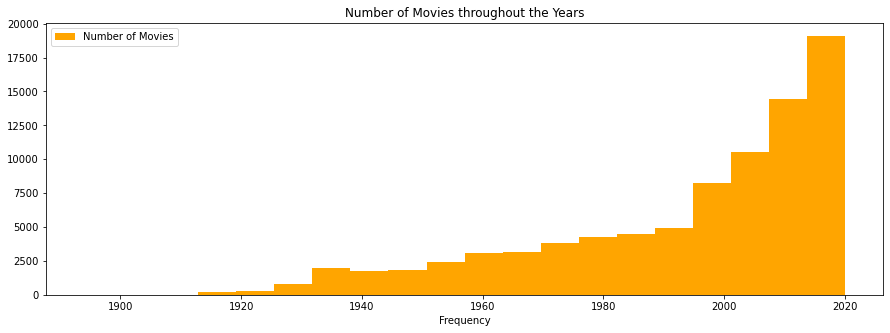

In [77]:
plt.figure(figsize = (15,5))
plt.hist(x = world_df1['year'], bins = 20, color = 'orange', label = 'Number of Movies')
plt.xlabel('Year')
plt.xlabel('Frequency')
plt.title('Number of Movies throughout the Years')
plt.legend()
plt.show()

This shows, that number of movies have increased at a steady pace until late 1900 and then made a big spike and have been increasing since then.

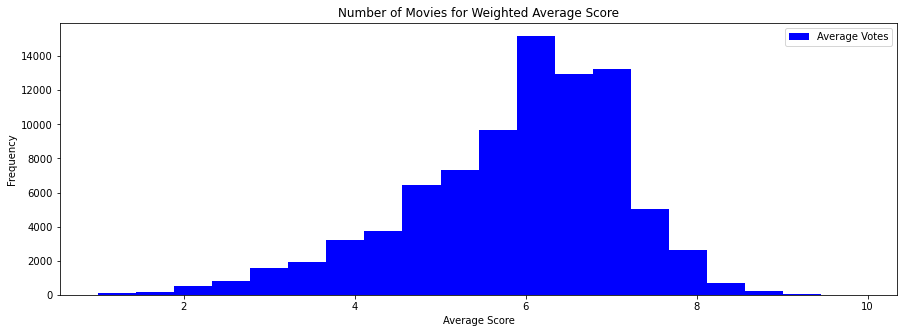

In [78]:
plt.figure(figsize = (15,5))
plt.hist(x = world_df1['weighted_average_vote'], bins = 20, color = 'blue', label = 'Average Votes')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.title('Number of Movies for Weighted Average Score')
plt.legend()
plt.show()

This is my target and it is normally distributed. I can see that there are very few movies with ratings more than 8 and rated less tha 3. I will keep this in mind. 


## Get movies from last 10 years  - since 2010

To keep data relevant, I am going to look at information from 2009 till 2020 to find popular movie, actors, directors and genres.   
(I donot have full 2020 year data in this dataset)

In [79]:
world_df2010 = world_df1[world_df1['year'] >2009]
world_df2010.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
15661,tt0069049,L'altra faccia del vento,The Other Side of the Wind,2018,2018-11-02,Drama,122,USA,Other,Orson Welles,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",5887,November,Friday,6.8,6.8,6.474287,6.414612,6.609705,6.042891
25444,tt0100275,La Telenovela Errante,La Telenovela Errante,2017,2018-09-06,"Comedy, Drama, Fantasy",80,Other,Other,"Raoul Ruiz, Valeria Sarmiento","Luis Alarcón, Patricia Rivadeneira, Francisco ...",260,September,Thursday,6.6,6.6,5.917986,5.799475,5.921459,6.005447
32403,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,2018-03-20,"Animation, Adventure, Comedy",83,Other,English,Anthony Harrison,"Anthony Harrison, C. Ernst Harth, Ellie Harvie...",264,March,Tuesday,8.8,8.9,6.312544,5.858175,6.163796,6.214925
32962,tt0146592,Pál Adrienn,Pál Adrienn,2010,2011-03-17,Drama,136,Other,Other,Ágnes Kocsis,"Éva Gábor, István Znamenák, Ákos Horváth, Lia ...",470,March,Thursday,6.7,6.9,5.896524,5.968471,5.994856,6.070738
33727,tt0162942,A zöld sárkány gyermekei,A zöld sárkány gyermekei,2010,2011-04-07,Drama,89,Other,Other,Bence Miklauzic,"Zoltán Rátóti, Yu Debin, Eszter Bánfalvi, Fere...",128,April,Thursday,6.8,7.1,5.902393,5.794009,5.891751,6.010284


### Top 10 titles by weighted_average voter ratings

In [80]:
world_df2010['votes'].describe()

count    2.910500e+04
mean     1.024215e+04
std      5.291523e+04
min      9.900000e+01
25%      2.190000e+02
50%      5.200000e+02
75%      1.848000e+03
max      2.002816e+06
Name: votes, dtype: float64

I am going to consider minimum votes as 5000 to consider as 50% of the vote counts are between 500 and 2.002816e+06.  

I can also see that median and mean are very far from each other. Mean is 10,242 and median is 520. Also it looks like there are many movies which has low number of votes which is making our median low and mean high.  

For my research I am interested in learning about movies and its trends which have been voted by more people to know what people really like and dislike which translates into a poor or good ratings.  

Hence I am going to consider number of votes more than or equal to 5000(approximate mean of mean and median).

Let us see how is the distribution of number of votes.

<AxesSubplot:ylabel='Frequency'>

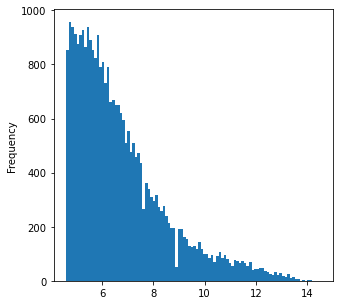

In [81]:
np.log(world_df2010['votes']).plot(kind = 'hist', bins = 100, figsize = (5,5))

I can see that there are more movies with lesser votes than more votes.

In [82]:
# let us filter out movies with less than 5000 votes

world_df2010 = world_df2010[world_df2010['votes'] > 4999]

In [83]:
# Check the shape of the datframe

world_df2010.shape

(4248, 20)

In [84]:
# Check the primary statisctics of the votes column

world_df2010['votes'].describe()

count    4.248000e+03
mean     6.542938e+04
std      1.249619e+05
min      5.000000e+03
25%      9.062750e+03
50%      1.915700e+04
75%      6.128875e+04
max      2.002816e+06
Name: votes, dtype: float64

<AxesSubplot:ylabel='Frequency'>

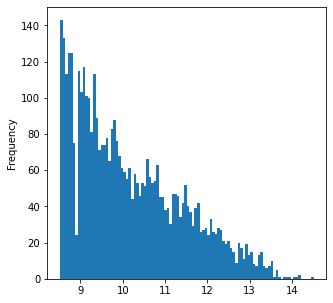

In [85]:
# Let us see the distribution again

np.log(world_df2010['votes']).plot(kind = 'hist', bins = 100, figsize = (5,5))

It looks like the density around lower votes have changed as a result of filtering votes with lower counts

In [86]:
# sorted by weighted average votes/ratings

top10_rated_movies = world_df2010.sort_values(by = 'weighted_average_vote', ascending = False)
top10_rated_movies.head(5) # really good movies in last 10 years

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
77212,tt5354160,Aynabaji,Aynabaji,2016,2016-09-30,"Crime, Mystery, Thriller",147,Other,Other,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Bijo...",19876,September,Friday,9.1,9.4,8.735989,7.881489,8.754770,7.497872
82739,tt7738784,Peranbu,Peranbu,2018,2019-02-01,Drama,147,Other,Other,"Ram, Amudhavan Karuppiah","Mammootty, Sadhana, Anjali, Anjali Ameer, Samu...",11752,February,Friday,9.0,9.2,7.936116,7.755012,8.604205,6.327273
78861,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,2017-01-20,"Drama, History",113,Other,Other,"Chathra Weeraman, Bharatha Hettiarachchi","Uddika Premarathna, Dilhani Ekanayake, Roshan ...",6618,January,Friday,9.0,9.6,8.708480,6.858718,8.575107,6.994631
78411,tt5813916,Montagna II,Dag II,2016,2016-11-04,"Action, Drama, War",135,Other,Other,Alper Caglar,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",103949,November,Friday,8.8,9.4,6.433364,8.538760,8.756914,8.459849
64077,tt2077886,The Phantom of the Opera at the Royal Albert Hall,The Phantom of the Opera at the Royal Albert Hall,2011,2011-10-02,"Drama, Music, Musical",137,Other,English,"Nick Morris, Laurence Connor","Ramin Karimloo, Sierra Boggess, Hadley Fraser,...",7775,October,Sunday,8.8,8.8,7.685901,7.903187,8.011327,8.171271


In [87]:
top10_rated_movies.tail(5) # really bad movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
79073,tt6038600,Smolensk,Smolensk,2016,2016-09-09,"Drama, Thriller",120,Other,Other,Antoni Krauze,"Beata Fido, Maciej Póltorak, Aldona Struzik, L...",7629,September,Friday,1.4,1.7,5.349001,2.911290,2.138131,4.016779
74262,tt4404474,Kartoffelsalat,Kartoffelsalat,2015,2015-07-23,"Comedy, Horror",81,Other,Other,Michael David Pate,"Joyce Ilg, Torge Oelrich, Otto Waalkes, Ernst-...",6512,July,Thursday,1.3,1.7,5.407638,2.936812,2.391968,5.229533
74425,tt4458206,Kod Adi K.O.Z.,Kod Adi K.O.Z.,2015,2015-02-13,"Crime, Mystery",114,Other,Other,Celal Çimen,"Cem Kurtoglu, Hakan Ural, Hazim Körmükcü, Tolg...",27100,February,Friday,1.3,2.5,3.926840,1.532412,1.458427,3.247390
81717,tt7221896,Cumali Ceber: Allah Seni Alsin,Cumali Ceber: Allah Seni Alsin,2017,2017-08-04,Comedy,100,Other,Other,Gökhan Gök,"Halil Söyletmez, Doga Konakoglu, Emre Keskin, ...",37592,August,Friday,1.0,2.0,4.583309,1.393199,1.184900,2.935986
82977,tt7886848,Sadak 2,Sadak 2,2020,2020-08-28,"Action, Drama",133,Other,Other,Mahesh Bhatt,"Priyanka Bose, Alia Bhatt, Pooja Bhatt, Sanjay...",53162,August,Friday,1.0,1.4,2.636984,1.725765,1.245248,3.338161


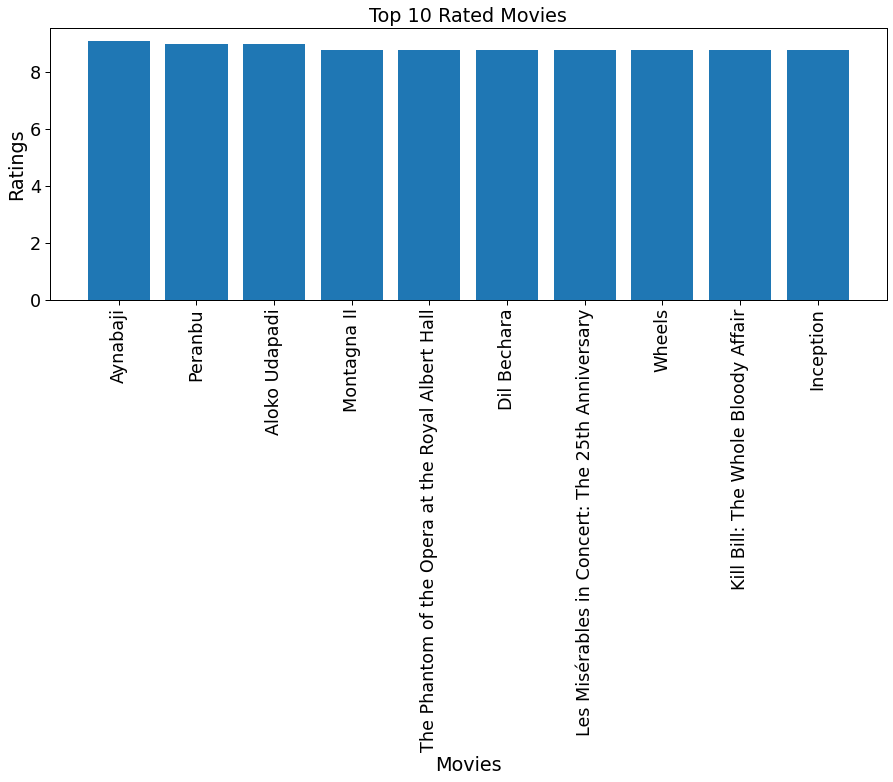

In [156]:
# Plot top 10 movies

plt.figure(figsize =(15,5))
plt.bar(x = top10_rated_movies['title'].head(10), height = top10_rated_movies['weighted_average_vote'].head(10))
plt.xlabel('Movies')
plt.ylabel('Ratings')
plt.title('Top 10 Rated Movies')
plt.xticks(rotation = 90)
plt.show()

Here we can see some pretty famous movies from around the world!

### Top 10 titles by  us voter ratings

In [89]:
# I am going to find top 10 movies that US residents have rated and also find top 10 movies that non-US residents have rated

top10_USrated_movies = world_df2010.sort_values(by = 'weighted_us_voters_rating', ascending = False).head(10)
top10_NonUSrated_movies = world_df2010.sort_values(by = 'weighted_non_us_voters_rating', ascending = False).head(10)

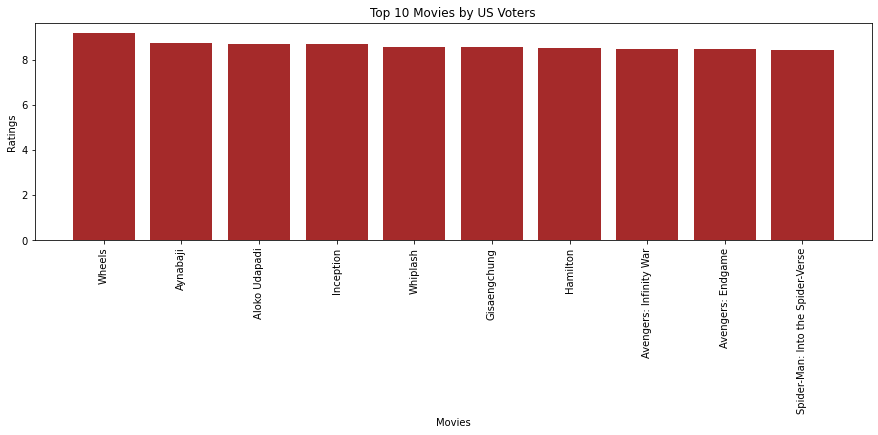

In [90]:
# Plot top 10 movies by US Residents

plt.figure(figsize =(15,4))
plt.bar(x = top10_USrated_movies['original_title'], height = top10_USrated_movies['weighted_us_voters_rating'], color = 'brown')
plt.title('Top 10 Movies by US Voters')
plt.xlabel('Movies')
plt.ylabel('Ratings')
plt.xticks(rotation = 90)
plt.show()

### Top 10 titles by non us voter ratings

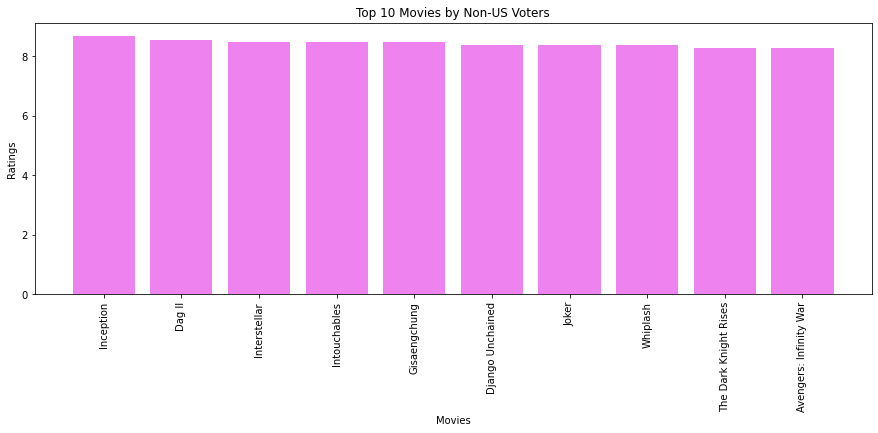

In [91]:
# Top 10 movies by Non-US residents rated

plt.figure(figsize =(15,5))
plt.bar(x = top10_NonUSrated_movies['original_title'], height = top10_NonUSrated_movies['weighted_non_us_voters_rating'], color = 'violet')
plt.xticks(rotation = 90)
plt.title('Top 10 Movies by Non-US Voters')
plt.xlabel('Movies')
plt.ylabel('Ratings')
plt.show()

3 different demographics gives us different results of what people like. But we can still see some common names coming up in results, which shows that good movies are liked and rated by most demographic groups.

Some common movies I see are Inception, Avenger movies, Wheels, Whiplash, and some international titles like Gisaengchung.

In [92]:
language = world_df1.groupby('language').mean()[['weighted_us_voters_rating','weighted_non_us_voters_rating']]
language

,weighted_us_voters_rating,weighted_non_us_voters_rating
language,,
English,5.944599,5.723971
Other,6.007777,5.921009


As we can see I dont see much of a difference in the average rating for US and Non-US residents, hence looks like language doesnot affect how people Rate movies.

## Directors Investigation - Last 10 years 2010

I want to see how Directors and Ratings of a movie are related. To do that I will need to unpack the list of director's name in each row.

Directors are multiple words in a column:  
1. I am going to first split them and stack them for each movie.  
2. Next I am going to merge it with ratings on primary key of unique imdb title id
3. Then I am going to count number of movies for each director using Transform method
4. Then I am going to calculate average mean of different ratings

**Stack Method**

Stacks the prescribed level(s) from columns to index.

Return a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels compared to the current DataFrame. The new inner-most levels are created by pivoting the columns of the current dataframe:

if the columns have a single level, the output is a Series

In [93]:
# Convert the tags by splitting on the comma delimeter convert to list and stack on the index.

new_df_d = pd.DataFrame(world_df2010.director.str.split(', ').tolist(), index = world_df2010.imdb_title_id).stack()
new_df_d

imdb_title_id   
tt0069049      0         Orson Welles
tt0249516      0    Lawrence Kasanoff
tt0315642      0        Bejoy Nambiar
tt0337692      0        Walter Salles
tt0359950      0          Ben Stiller
                          ...        
tt9806322      0        Oliver Kienle
tt9817070      0       Saeed Roustayi
tt9860728      0         Roger Kumble
tt9898858      0        Michael Dowse
tt9900782      0     Lokesh Kanagaraj
Length: 4580, dtype: object

In [94]:
# Reset index and create new index starting from 0

new_df_d = new_df_d.reset_index([0, 'imdb_title_id'])
new_df_d.head()

,imdb_title_id,0
0,tt0069049,Orson Welles
1,tt0249516,Lawrence Kasanoff
2,tt0315642,Bejoy Nambiar
3,tt0337692,Walter Salles
4,tt0359950,Ben Stiller


In [95]:
# Select columns which I want to merge with the list of directors

world_dfdirector = world_df2010[['imdb_title_id','weighted_average_vote','weighted_us_voters_rating','weighted_non_us_voters_rating']]

In [96]:
# Merge the dataframes

world_dfdirector = new_df_d.merge(world_dfdirector, on = 'imdb_title_id')

In [97]:
# Rename the column and clean up the dataframe

world_dfdirector['director'] = world_dfdirector[0]
world_dfdirector.drop([0], inplace = True, axis = 1)

In [98]:
world_dfdirector.head()

,imdb_title_id,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,director
0,tt0069049,6.8,6.474287,6.414612,Orson Welles
1,tt0249516,1.5,3.029844,2.886139,Lawrence Kasanoff
2,tt0315642,7.1,6.352055,6.728889,Bejoy Nambiar
3,tt0337692,6.1,5.817979,6.082734,Walter Salles
4,tt0359950,7.3,7.354653,7.288300,Ben Stiller


In [99]:
# Now I am going to create a new column called Movies 
# I want to groupby director and count the movies each director is associated with.

world_dfdirector['movies'] = world_dfdirector.groupby(['director'])['imdb_title_id'].transform('count')

In [100]:
# Drop ImbD title as I dont require it now.

world_dfdirector.drop(['imdb_title_id'], axis = 1, inplace = True)

In [101]:
# Now I want the mean of all the ratings grouped by director.

director = world_dfdirector.groupby('director').mean()
director.head()

,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,movies
director,,,,
A.L. Vijay,6.100000,5.919872,5.567935,2
A.R. Murugadoss,7.116667,6.383001,6.460053,6
Aanand L. Rai,6.875000,6.195899,6.579007,4
Aaron Hann,6.000000,6.068000,5.984403,1
Aaron Harvey,4.600000,5.082653,4.700082,1


In [102]:
#Sort the list by movies descending.

director =director.sort_values(by = 'movies', ascending = False)
director.head()

,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,movies
director,,,,
Woody Allen,6.677778,6.532467,6.618365,9
Steven Soderbergh,6.550000,6.595534,6.478258,8
Tyler Perry,5.150000,5.312634,5.058735,8
Clint Eastwood,6.762500,6.763714,6.712668,8
Mike Flanagan,6.457143,6.567436,6.312455,7


In [103]:
# Reset index and find top 10 directors

director.reset_index('director',drop = False, inplace = True)
director10 = director.head(10)
director10

,director,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,movies
0,Woody Allen,6.677778,6.532467,6.618365,9
1,Steven Soderbergh,6.550000,6.595534,6.478258,8
2,Tyler Perry,5.150000,5.312634,5.058735,8
3,Clint Eastwood,6.762500,6.763714,6.712668,8
4,Mike Flanagan,6.457143,6.567436,6.312455,7
5,David Gordon Green,6.285714,6.302741,6.170002,7
6,Steven Spielberg,7.214286,7.217543,7.126373,7
7,Ridley Scott,6.585714,6.595230,6.535470,7
8,Luc Besson,6.385714,6.201681,6.280742,7
9,Paul Feig,6.483333,6.595464,6.335383,6


### Directors in  maximum movies

Top 10 Directors who have directed maximum movies

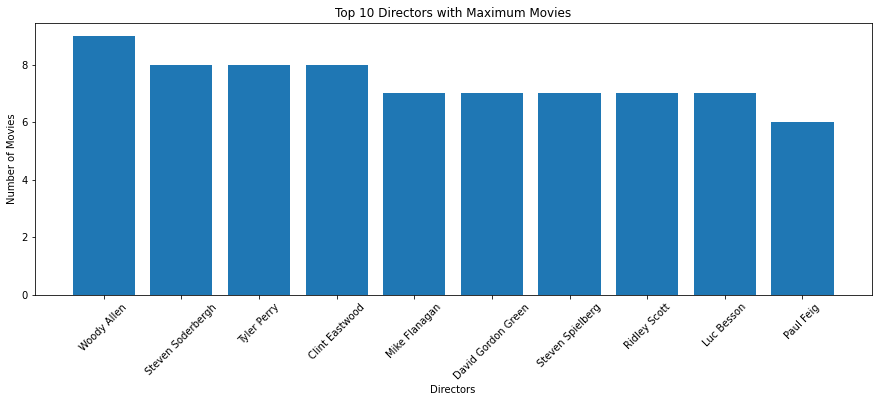

In [104]:
plt.figure(figsize = (15,5))
plt.bar(height = director10['movies'], x = director10['director'])
plt.xlabel('Directors')
plt.ylabel('Number of Movies')
plt.title('Top 10 Directors with Maximum Movies')
plt.xticks(rotation = 45)
plt.show()

This shows the directors with maximum number of Movies. Looking at these names and doing some research, not all these directors are associated with highly rated movies, though they have directed more movies in last 10 years than others.

## Directors with more than 5 movies sorted by Ratings

This graph shows Directors who have directed more than 5 movies, because I didnt want to account for one or two movie wonders.
Then I am going to sort those directors by their mean weighted average vote.

In [105]:
Threshold_15d = director[director['movies'] > 5].sort_values(by = 'weighted_average_vote', ascending = False)
Threshold_15d.head(5)

,director,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,movies
20,Denis Villeneuve,7.800000,7.800664,7.718392,6
17,Hirokazu Koreeda,7.466667,6.804070,7.173733,6
12,Anurag Kashyap,7.350000,6.419496,6.982629,6
6,Steven Spielberg,7.214286,7.217543,7.126373,7
13,Richard Linklater,7.150000,7.175978,6.976106,6


<AxesSubplot:ylabel='director'>

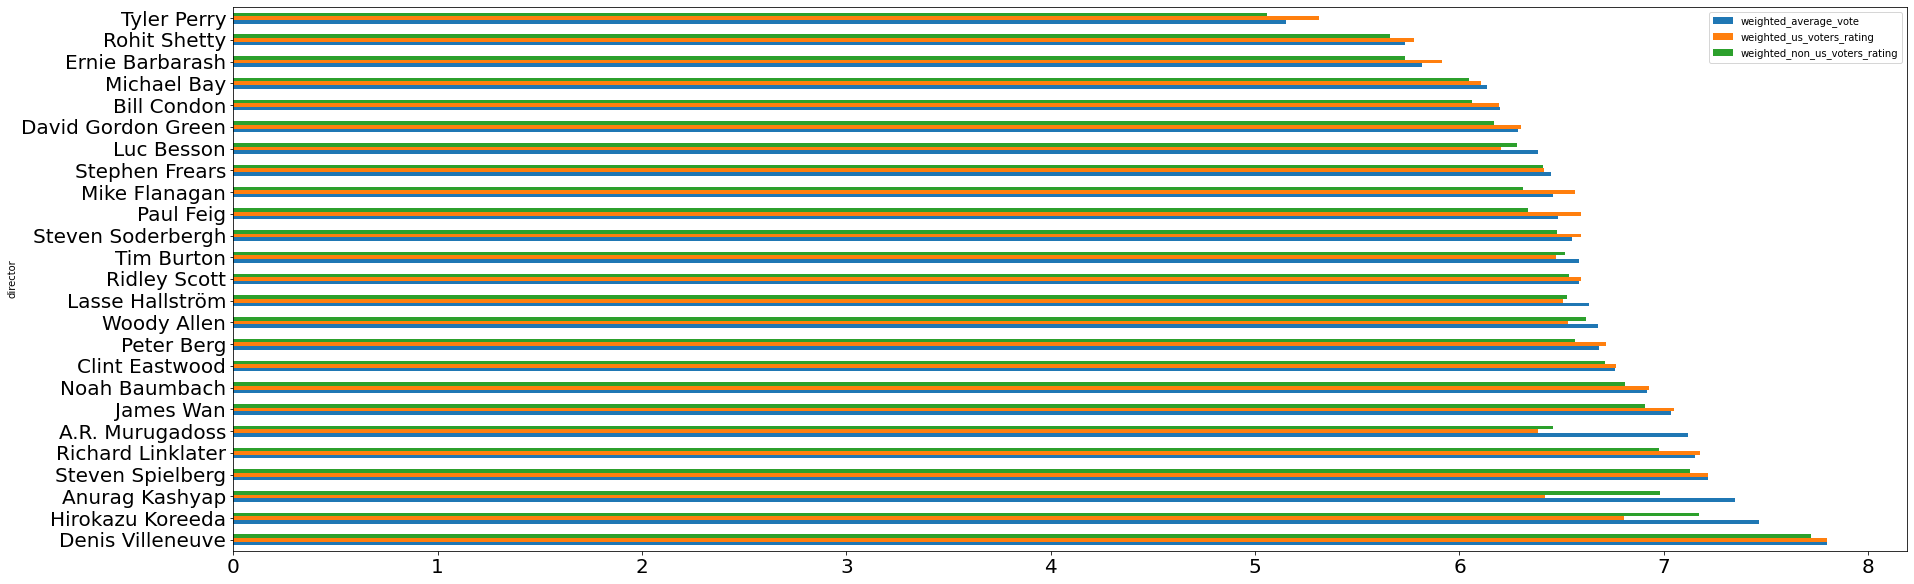

In [106]:
Threshold_15d[['director','weighted_average_vote','weighted_us_voters_rating','weighted_non_us_voters_rating']].plot(kind = 'barh', figsize = (30,10),
                                                                                                                rot = 0, x = 'director', fontsize = 20)

The above graph shows Rating overall for the whole world, US Voters and Non US Voters for Top 10 Directors who have directed atleast 5 movies and are sorted by mean weighted average ratings for all their movies.

I can see that the list is not the same as Maximum Movies directed by a Director list. 

I can right away tell I can see some wellknown names like Ridley Scott, Noah Baumbach who has directed Academy Award winning movies, Denis Villeneuve who has directed movies like Blade Runner, Arrival, Incendies and more.

Everyone knows Steven Speilberg! Clint Eastwood is the name which is well known in the movie industry.

Anurag Kashyap and A.R. Murugadoss are Well Known Directors from India

hirokazu koreeda is a famous Director from Japan.

## Actors in last 10 years 2010 for Ratings and Maximum Number of Movies

I am going to use same approach as I did earlier with Directors. I am going to unpack the list of names of actors present in one movie and stack them.  

Then I am going to count how many movies they appear in and calculate mean of weighted average for all the movies they acted in.
Then we will see some trends and patterns.

In [107]:
# Convert the tags by splitting on the comma delimeter convert to list and stack on the index.

new_df = pd.DataFrame(world_df2010.actors.str.split(', ').tolist(), index = world_df2010.imdb_title_id).stack()
new_df = new_df.reset_index([0, 'imdb_title_id'])
new_df.head()

,imdb_title_id,0
0,tt0069049,John Huston
1,tt0069049,Oja Kodar
2,tt0069049,Peter Bogdanovich
3,tt0069049,Susan Strasberg
4,tt0069049,Norman Foster


In [108]:
# Select columns which I want to merge with the list of actors

world_dfactors = world_df2010[['imdb_title_id','weighted_average_vote','weighted_us_voters_rating','weighted_non_us_voters_rating','year']]

In [109]:
# merge two dataframes

world_dfactors = new_df.merge(world_dfactors, on = 'imdb_title_id')

In [110]:
# Rename the column and clean up the dataframe

world_dfactors['actors'] = world_dfactors[0]
world_dfactors.drop([0], inplace = True, axis = 1)

In [111]:
world_dfactors.head()

,imdb_title_id,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,year,actors
0,tt0069049,6.8,6.474287,6.414612,2018,John Huston
1,tt0069049,6.8,6.474287,6.414612,2018,Oja Kodar
2,tt0069049,6.8,6.474287,6.414612,2018,Peter Bogdanovich
3,tt0069049,6.8,6.474287,6.414612,2018,Susan Strasberg
4,tt0069049,6.8,6.474287,6.414612,2018,Norman Foster


In [112]:
# Now I am going to create a new column called Movies 
# I want to groupby director and count the movies each actor is associated with.

world_dfactors['movies'] = world_dfactors.groupby(['actors'])['imdb_title_id'].transform('count')

In [113]:
# Drop ImbD title as I dont require it now.

world_dfactors.drop(['imdb_title_id'], axis = 1, inplace = True)

In [114]:
# Now I want the mean of all the ratings grouped by actor.

actor = world_dfactors.groupby('actors').mean()
actor.head()

,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,year,movies
actors,,,,,
50 Cent,5.430000,5.719221,5.400434,2014.200000,10
A Martinez,5.600000,6.072330,5.419931,2013.000000,1
A. Jay Radcliff,5.800000,5.533639,5.700000,2010.000000,1
A. Venkatesh,8.500000,6.865808,7.525960,2019.000000,1
A.C. Peterson,5.766667,5.891683,5.745225,2012.666667,3


In [115]:
# Sort by movies in descending order

actor =actor.sort_values(by = 'movies', ascending = False)
actor.head()

,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,year,movies
actors,,,,,
Samuel L. Jackson,6.468571,6.529398,6.381008,2014.885714,35
Akshay Kumar,6.100000,6.073354,5.911962,2014.500000,32
Bruce Willis,5.570000,5.855864,5.572304,2014.633333,30
James Franco,6.143333,6.247823,6.104468,2013.833333,30
Nicolas Cage,5.566667,5.791582,5.560384,2014.866667,30


In [116]:
# Reset Index

actor.reset_index('actors',drop = False, inplace = True)

In [117]:
# Top 10 actors with maximum movies

actor10 = actor.head(10)
actor10

,actors,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,year,movies
0,Samuel L. Jackson,6.468571,6.529398,6.381008,2014.885714,35
1,Akshay Kumar,6.100000,6.073354,5.911962,2014.500000,32
2,Bruce Willis,5.570000,5.855864,5.572304,2014.633333,30
3,James Franco,6.143333,6.247823,6.104468,2013.833333,30
4,Nicolas Cage,5.566667,5.791582,5.560384,2014.866667,30
5,Anna Kendrick,6.268966,6.366408,6.156123,2014.379310,29
6,Woody Harrelson,6.688000,6.657351,6.576840,2015.320000,25
7,J.K. Simmons,6.712000,6.608855,6.614690,2015.160000,25
8,Michael Peña,6.324000,6.369367,6.235646,2015.040000,25
9,Michael Shannon,6.512500,6.528347,6.406803,2014.333333,24


### Actors in  Maximum Movies
This graph shows number of movies an actor has acted in.

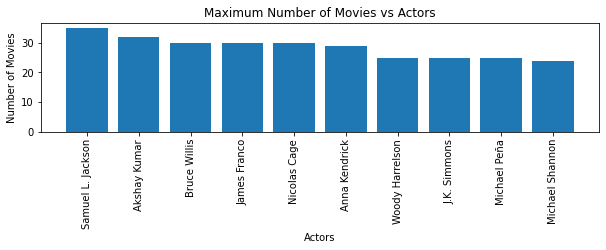

In [118]:
plt.figure(figsize = (10,2))
plt.bar(height = actor10['movies'], x = actor10['actors'])
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Maximum Number of Movies vs Actors')
plt.xticks(rotation = 90)
plt.show()

I can see here some famous names but not necessarily associated with high rated movies, meaning more than average ratings for all their movies above 7

## Actors in more than 15 movies sorted by Ratings

I want to see actors who have appeared in atleast 15 movies and are sorted by mean of all their movies weighted average. I want to make threshold of 15 movies to weed out actors appearing in fewer movies to keep actors who have been in consistently good rated movies.     
I wanted the actor to be famous when he or she has consistently worked in a highly rated movie.

In [119]:
# Filter and sort values by weighted average

Threshold_15 = actor[actor['movies'] > 15].sort_values(by = 'weighted_average_vote', ascending = False).head(10)
Threshold_15.head(10)

,actors,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,year,movies
122,Nawazuddin Siddiqui,7.435294,6.639966,7.090828,2015.058824,17
119,Mark Ruffalo,7.364706,7.313253,7.246809,2014.000000,17
17,Nassar,7.309091,6.396698,6.706760,2014.772727,22
113,Benedict Cumberbatch,7.235294,7.100949,7.113098,2014.529412,17
29,Scarlett Johansson,7.231818,7.273581,7.129008,2015.090909,22
103,Chris Evans,7.205882,7.256486,7.065389,2014.411765,17
120,Domhnall Gleeson,7.182353,7.155471,7.065277,2015.411765,17
129,Joy Badlani,7.117647,6.275544,6.468885,2015.529412,17
109,Prakash Raj,7.088235,6.268131,6.453453,2014.647059,17
114,Zoe Saldana,7.023529,6.962571,6.907922,2014.470588,17


<AxesSubplot:ylabel='actors'>

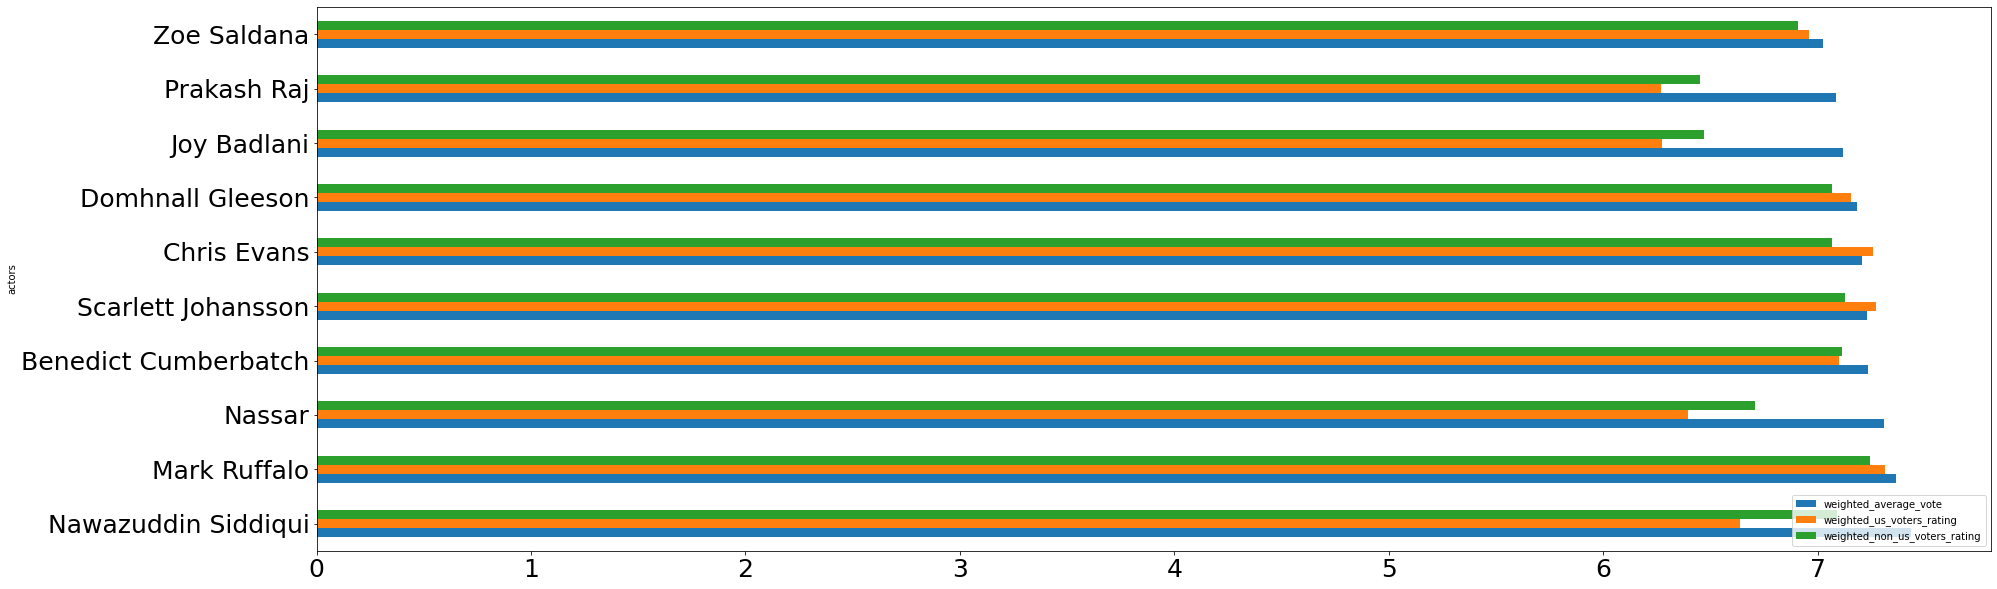

In [120]:
# Plot to see how different demographics have voted these movies associated with these popular actors

Threshold_15[['actors','weighted_average_vote','weighted_us_voters_rating','weighted_non_us_voters_rating']].plot(kind = 'barh', figsize = (30,10), rot = 0, 
                                                                                                                  x= 'actors', fontsize = 25 )

I see some popular names here  like Mark Ruffalo, Scarlett Johansson, etc. 

More interesting is how different demographics have rated the movies that they are associated.

So I can see that Non-US residents and US residents as well as overall wieghted ratings are similar for actors like Domhnall Gleeson, Mark Ruffalo, Benedict Cumberbatch.  

I can also see that movies with artists like Nawazuddin Siddiqui, Joy Badlani have been rated higher by Non-US residents as they are Country specific.

# Genres EDA for last 10 years

I am going to use same approach as I did earlier with Directors. I am going to unpack the list of genres present in one movie and stack them.  

Then I am going to count how many movies they appear in and calculate mean of weighted average for all the movies they belong.
Then we will see some trends and patterns.

In [121]:
# Convert the tags by splitting on the comma delimeter convert to list and stack on the index.

new_dfg = pd.DataFrame(world_df2010.genre.str.split(', ').tolist(), index = world_df2010.imdb_title_id).stack()
new_dfg = new_dfg.reset_index([0, 'imdb_title_id'])
new_dfg.head()

,imdb_title_id,0
0,tt0069049,Drama
1,tt0249516,Animation
2,tt0249516,Action
3,tt0249516,Adventure
4,tt0315642,Action


In [122]:
# Select columns which I want to merge with the list of genres

world_dfgenres = world_df2010[['imdb_title_id','year','weighted_average_vote','weighted_us_voters_rating','weighted_non_us_voters_rating','weighted_females_allages_rating','weighted_males_allages_rating']]

In [123]:
# merge dataframes

world_dfgenres = new_dfg.merge(world_dfgenres, on = 'imdb_title_id')

In [124]:
# Rename column name

world_dfgenres['genres'] = world_dfgenres[0]
world_dfgenres.drop([0], inplace = True, axis = 1)

In [125]:
world_dfgenres.head()

,imdb_title_id,year,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_females_allages_rating,weighted_males_allages_rating,genres
0,tt0069049,2018,6.8,6.474287,6.414612,6.042891,6.609705,Drama
1,tt0249516,2011,1.5,3.029844,2.886139,4.363494,2.239214,Animation
2,tt0249516,2011,1.5,3.029844,2.886139,4.363494,2.239214,Action
3,tt0249516,2011,1.5,3.029844,2.886139,4.363494,2.239214,Adventure
4,tt0315642,2016,7.1,6.352055,6.728889,6.541021,6.990184,Action


In [126]:
# convert year to str as I donot want any aggregation on years

world_dfgenres['year'] = world_dfgenres['year'].astype('str')

In [127]:
# Count number of movies for each genre

world_dfgenres['movies'] = world_dfgenres.groupby(['genres'])['imdb_title_id'].transform('count')

In [128]:
# Drop title id as it is not required anymore

world_dfgenres.drop(['imdb_title_id'], axis = 1, inplace = True)

In [129]:
# groupby genres and calculate mean of ratings of all movies for each genre

genre = world_dfgenres.groupby('genres').mean()
genre.head()

,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_females_allages_rating,weighted_males_allages_rating,movies
genres,,,,,,
Action,6.297783,6.223895,6.140751,6.318069,6.221802,1173
Adventure,6.397455,6.342325,6.295057,6.544145,6.326942,668
Animation,6.752055,6.483905,6.596559,6.741215,6.626512,219
Biography,6.904507,6.645251,6.723607,6.824866,6.772478,355
Comedy,6.302748,6.214126,6.177746,6.354748,6.212719,1419


In [130]:
# Sort by Number of movies in each genre as mean is very identical to each other.

genre =genre.sort_values(by = 'movies', ascending = False)
genre.head()

,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_females_allages_rating,weighted_males_allages_rating,movies
genres,,,,,,
Drama,6.631439,6.407047,6.454747,6.539069,6.507771,2516
Comedy,6.302748,6.214126,6.177746,6.354748,6.212719,1419
Action,6.297783,6.223895,6.140751,6.318069,6.221802,1173
Thriller,6.171412,6.119637,6.051882,6.176575,6.118963,843
Crime,6.444596,6.292612,6.303492,6.359218,6.373112,731


In [131]:
# Reset Index

genre.reset_index('genres',drop = False, inplace = True)
genre10 = genre.head(10)
genre10

,genres,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_females_allages_rating,weighted_males_allages_rating,movies
0,Drama,6.631439,6.407047,6.454747,6.539069,6.507771,2516
1,Comedy,6.302748,6.214126,6.177746,6.354748,6.212719,1419
2,Action,6.297783,6.223895,6.140751,6.318069,6.221802,1173
3,Thriller,6.171412,6.119637,6.051882,6.176575,6.118963,843
4,Crime,6.444596,6.292612,6.303492,6.359218,6.373112,731
5,Adventure,6.397455,6.342325,6.295057,6.544145,6.326942,668
6,Romance,6.427074,6.262968,6.278893,6.442515,6.284981,639
7,Horror,5.721993,5.904340,5.660628,5.895365,5.723001,582
8,Mystery,6.136712,6.109880,6.029745,6.165867,6.091544,444
9,Biography,6.904507,6.645251,6.723607,6.824866,6.772478,355


### Genres in  maximum movies

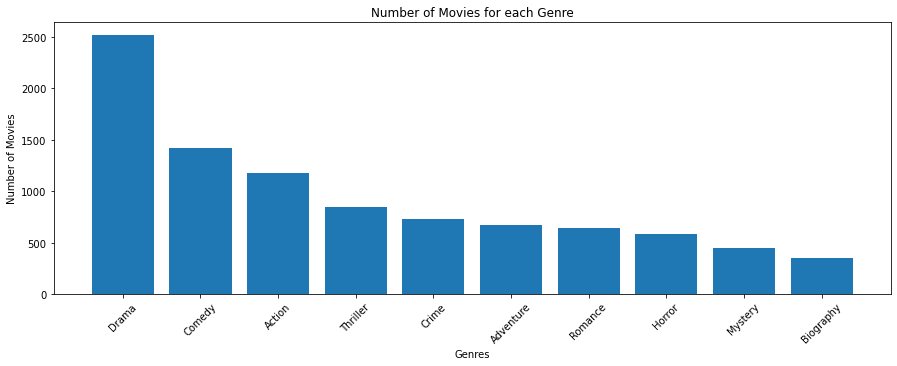

In [132]:
# Plot Number of Movies for each Genre

plt.figure(figsize = (15,5))
plt.bar(height = genre10['movies'], x = genre10['genres'])
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies for each Genre')
plt.xticks(rotation = 45)
plt.show()

Genres with more than 1000 movies sorted by Ratings

In [133]:
Threshold_15g = genre[genre['movies'] > 1000].sort_values(by = 'weighted_average_vote', ascending = False)
Threshold_15g.head(5)

,genres,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_females_allages_rating,weighted_males_allages_rating,movies
0,Drama,6.631439,6.407047,6.454747,6.539069,6.507771,2516
1,Comedy,6.302748,6.214126,6.177746,6.354748,6.212719,1419
2,Action,6.297783,6.223895,6.140751,6.318069,6.221802,1173


<AxesSubplot:ylabel='genres'>

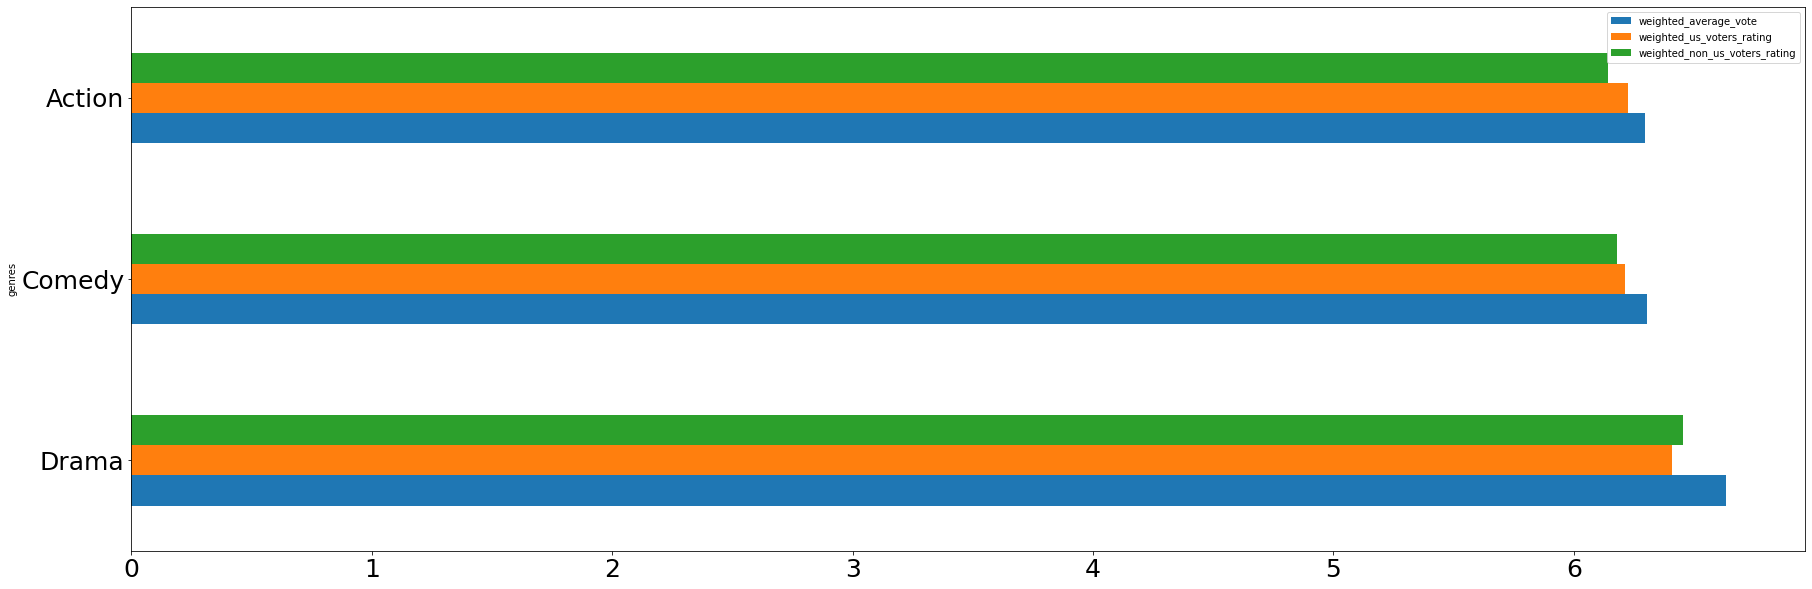

In [134]:
# Plot top 3 genres and ratings by different demographics

Threshold_15g[['genres','weighted_average_vote','weighted_us_voters_rating','weighted_non_us_voters_rating']].plot(kind = 'barh', figsize = (30,10), rot = 0, x='genres', fontsize = 25 )

I can see similarities in the ratings across different types of audience.

## Genre Insights

### Movie ratings for single category tags across World, US and Non-US

<AxesSubplot:ylabel='genres'>

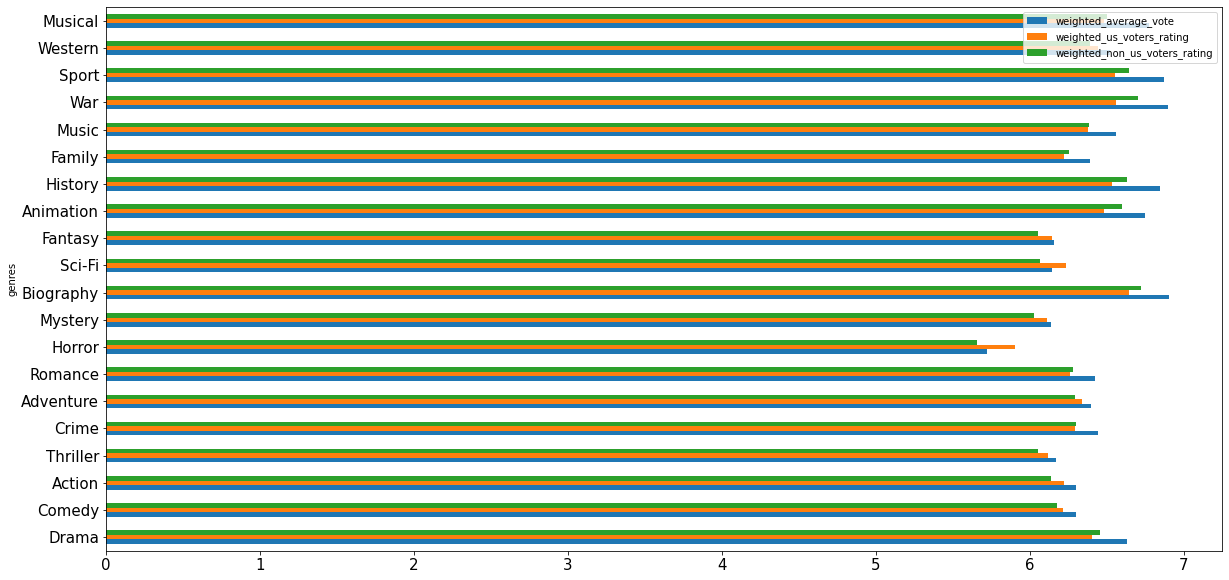

In [135]:
genre[['genres','weighted_average_vote','weighted_us_voters_rating','weighted_non_us_voters_rating']].plot(kind = 'barh', figsize = (20,10), x='genres', rot = 0, fontsize = 15)

I can see that `Biography`, `Sport`, `Western`, `History`,`Animation` and `Drama` are some of the genres having highly rated movies.  
`Horror` and `Sci-Fi` seems to be liked /rated by US voters.

### Ratings by Males and Females for each genre

<AxesSubplot:ylabel='genres'>

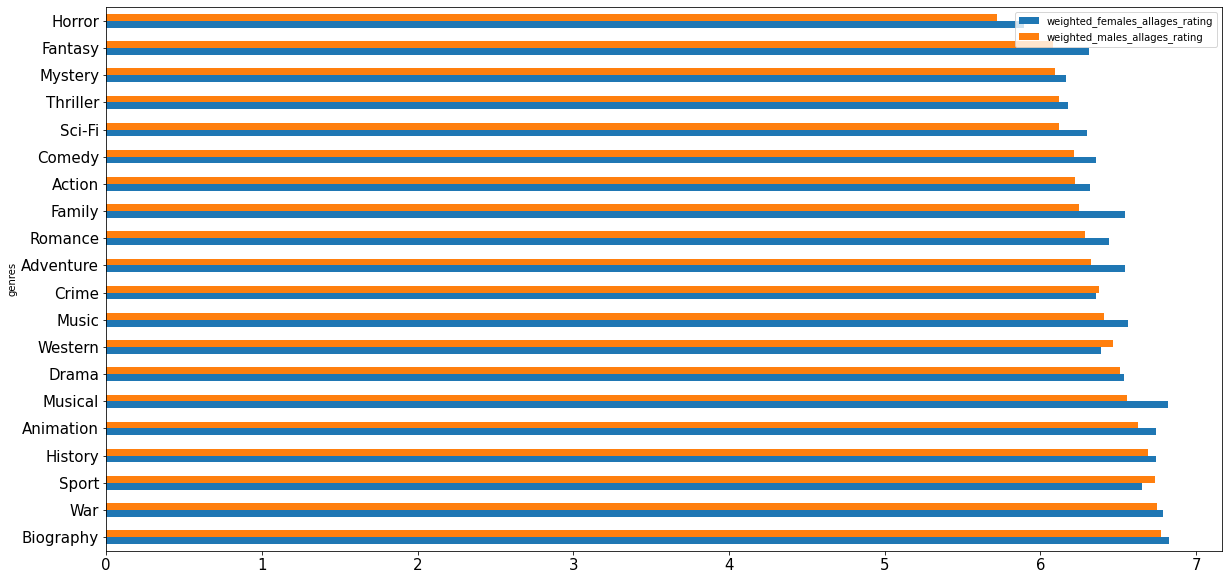

In [136]:
genre.groupby('genres').mean()[['weighted_females_allages_rating','weighted_males_allages_rating']].sort_values(by = 'weighted_males_allages_rating', ascending = False).plot(kind = 'barh', figsize = (20,10), fontsize = 15)

I can see that females rate higher than males across all genres.  

It is also interesting  to see that `Musicals`, `Family`, `Adventure` and `Fantasy` seems to have larger difference between how males rate movies and females.

### Number of movies in genre by year 

`Drama`, `Comedy`, `Action`, `Thriller`, `Horror` are the top 5 categories in which  more movies are made. 

In [137]:
world_dfgenres = world_dfgenres[(world_dfgenres['genres'] == 'Drama') |(world_dfgenres['genres'] == 'Comedy')|(world_dfgenres['genres'] == 'Action')|(world_dfgenres['genres'] == 'Horror')|(world_dfgenres['genres'] == 'Thriller')]

In [138]:
world_dfgenres.sort_values(by = 'year')

,year,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_females_allages_rating,weighted_males_allages_rating,genres,movies
911,2010,6.2,6.077842,6.078985,6.356743,6.088180,Comedy,1419
2407,2010,6.2,6.061210,6.128775,6.250932,6.061380,Drama,2516
2406,2010,6.2,6.061210,6.128775,6.250932,6.061380,Comedy,1419
1103,2010,6.3,6.262307,6.187575,6.368302,6.192167,Horror,582
1104,2010,6.3,6.262307,6.187575,6.368302,6.192167,Thriller,843
...,...,...,...,...,...,...,...,...
6652,2020,5.7,5.753996,5.620072,6.000000,5.622566,Comedy,1419
10461,2020,5.3,5.539521,5.381749,5.696618,5.376523,Drama,2516
10462,2020,5.3,5.539521,5.381749,5.696618,5.376523,Horror,582
10358,2020,1.0,2.636984,1.725765,3.338161,1.245248,Drama,2516


In [139]:
# Count number of movies per year for each genre

world_dfgenres1 = world_dfgenres.sort_values(by = 'year').groupby(['year','genres']).count()
world_dfgenres1.reset_index(drop = False, inplace = True)

In [140]:
world_dfgenres1.head()

,year,genres,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_females_allages_rating,weighted_males_allages_rating,movies
0,2010,Action,99,99,99,99,99,99
1,2010,Comedy,146,146,146,146,146,146
2,2010,Drama,224,224,224,224,224,224
3,2010,Horror,45,45,45,45,45,45
4,2010,Thriller,71,71,71,71,71,71


<AxesSubplot:xlabel='year', ylabel='movies'>

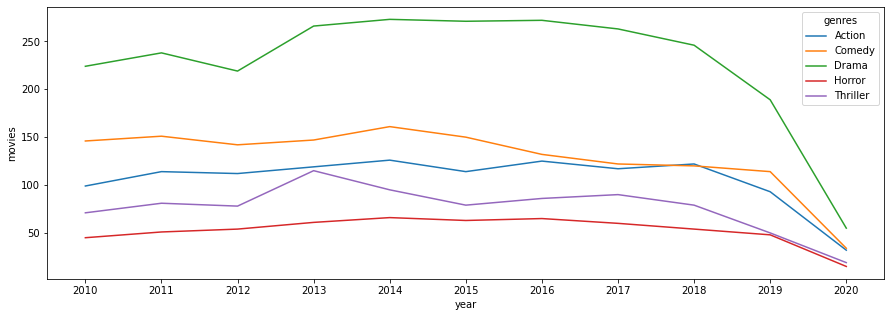

In [141]:
# Plot Number of Movies each year by top 5 Genres

fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=world_dfgenres1, x = 'year', y = 'movies', hue = 'genres', ax = ax)

It is interesting to see that in past 10 years there has been consitency in trend of which genre most movies are made.  

`Drama` has been first choice since atleast 10 years!

### US Voters rating by genre by year

<AxesSubplot:xlabel='year', ylabel='weighted_us_voters_rating'>

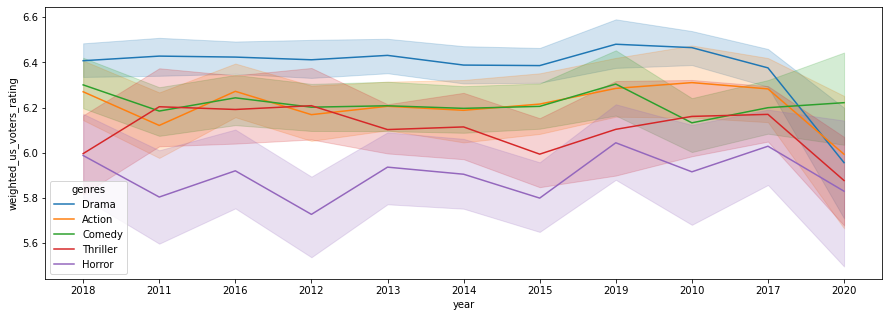

In [142]:
#Plot weighted US voter rating each year by top 5 Genres

fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=world_dfgenres,x = 'year', y = 'weighted_us_voters_rating', hue = 'genres', ax = ax)

I can observe that average rating of movies by US Residents for each year by genre shows that `Drama` is the top genre. I can also see that the number of movies made in each genre are related to the average movie ratings from above two graphs. Hence proves that movies are made in genre which people tend to vote higher!

### Non- US Voters rating by genre by year

<AxesSubplot:xlabel='year', ylabel='weighted_non_us_voters_rating'>

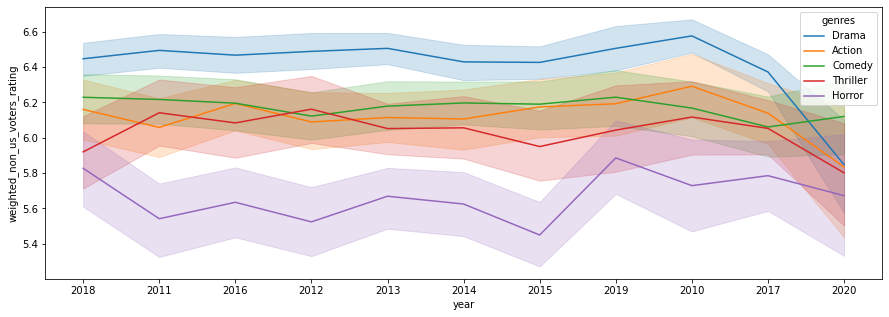

In [143]:
#Plot weighted Non-US voter rating each year by top 5 Genres

fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data= world_dfgenres,x = 'year', y = 'weighted_non_us_voters_rating', hue = 'genres', ax = ax)

I can observe that average rating of movies by Non-US Residents for each year by genre shows that `Drama` is the top genre. I can also see that the number of movies made in each genre are related to the average movie ratings from above two graphs. Hence proves that movies are made in genre which people tend to vote higher!

## Duration vs Average Weight Ratings

I wanted to know how Ratings are affected by length of the films

In [144]:
duration = world_df1[['duration','weighted_average_vote','weighted_non_us_voters_rating','weighted_us_voters_rating']]
duration.head()

,duration,weighted_average_vote,weighted_non_us_voters_rating,weighted_us_voters_rating
0,45,5.9,5.719626,5.924263
1,70,6.1,5.824343,5.908759
2,53,5.8,5.721906,5.909020
3,100,5.2,5.604977,5.831400
4,68,7.0,6.399815,6.260753


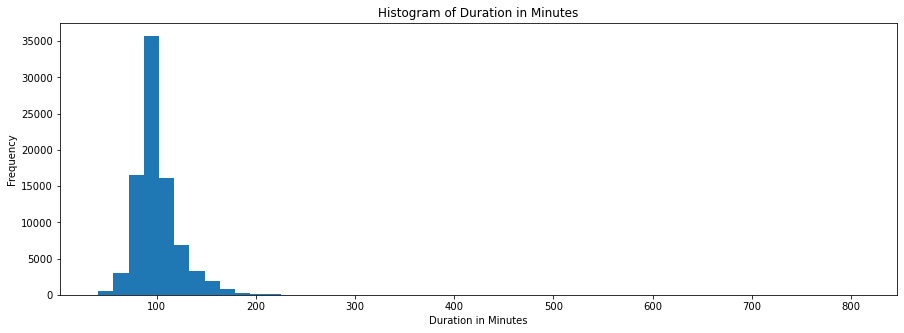

In [145]:
# Plot Duration Histogram

plt.figure(figsize = (15,5))
plt.hist(duration['duration'], bins = 50)
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.title('Histogram of Duration in Minutes')
plt.show()

I can see that the plot is uniformly distributed. There are most movies with duration 100 mins.

<AxesSubplot:xlabel='duration', ylabel='weighted_average_vote'>

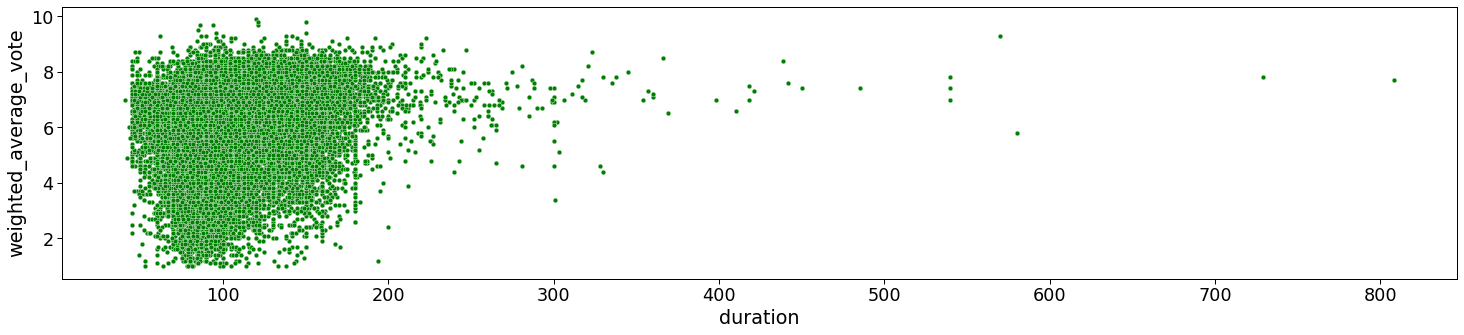

In [146]:
# Scatter plot to see weighted average and duration of movies in minutes

sns.set_context("paper", font_scale=2)  
fig_dims = (25, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=duration,x = 'duration', y = 'weighted_average_vote', ax = ax, color = 'green')

After closely looking at the plot, I can right away say that there is lot of noise.  
But I can also see that movies with duration more than 100 mins tend to have fewer lower ratings.  
I can also see some outliers like movies with exceptionally long duration like 700 and 800 mins. That could be an error in measurement or data. I will keep this in mid for future modeling.

### Movie  from the Country and Voting Habits

I wanted to see if there was a difference in the ratings for the movies from US vs Other Countries

In [147]:
# Create dataframe for Country

Country = world_df1[['country','weighted_average_vote','weighted_non_us_voters_rating','weighted_us_voters_rating']]
Country

,country,weighted_average_vote,weighted_non_us_voters_rating,weighted_us_voters_rating
0,USA,5.9,5.719626,5.924263
1,Other,6.1,5.824343,5.908759
2,Other,5.8,5.721906,5.909020
3,USA,5.2,5.604977,5.831400
4,Other,7.0,6.399815,6.260753
...,...,...,...,...
85426,Other,6.8,5.815068,5.937198
85427,Other,5.3,5.629489,5.908611
85428,Other,7.7,6.259078,5.911550
85429,Other,6.4,5.700498,5.879104


<AxesSubplot:xlabel='weighted_non_us_voters_rating', ylabel='country'>

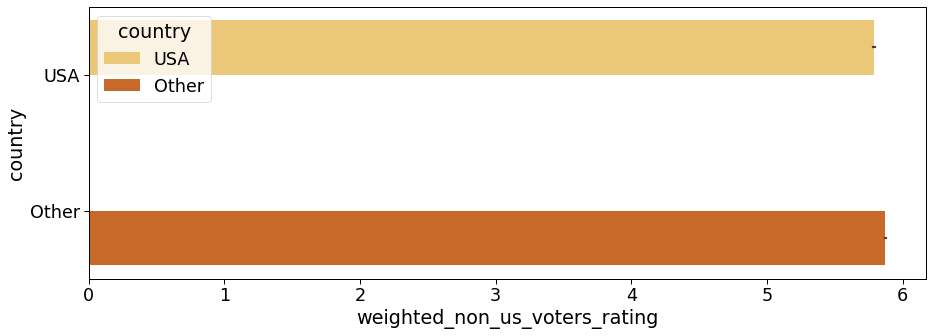

In [148]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=Country,y = 'country', x = 'weighted_non_us_voters_rating', ax = ax, hue = 'country', palette = 'YlOrBr')

I dont see any difference in how people rate movies based on the country of release.

<AxesSubplot:xlabel='weighted_us_voters_rating', ylabel='country'>

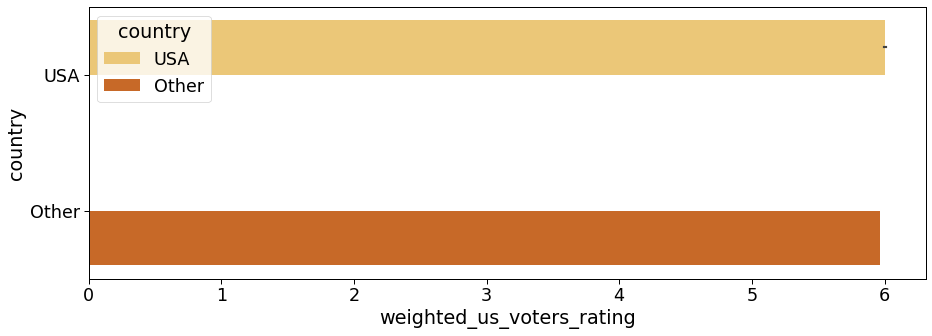

In [149]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=Country,y = 'country', x = 'weighted_us_voters_rating', ax = ax, hue = 'country', palette = 'YlOrBr')

I dont see any difference in how people rate movies based on the country of release.

**This concludes basic EDA and visualization of the dataset.** 

**Next Notebook is dedicated to Modeling based on insights gained in this notebook.**

### Downloading CSVs

In [150]:
world_df1.to_csv(r'Created_Data\world_df1.csv', index = False)

In [151]:
df2010 = world_df1[world_df1['year'] >2009]

In [152]:
df2010.shape

(29105, 20)

In [153]:
df2010.to_csv(r'Created_Data\world_df2010.csv', index = False)

In [154]:
actor.to_csv(r'Created_Data\actor.csv', index = False)
director.to_csv(r'Created_Data\director.csv', index = False)
genre.to_csv(r'Created_Data\genre.csv', index = False)
world_dfgenres.to_csv(r'Created_Data\world_dfgenres.csv', index = False)
duration.to_csv(r'Created_Data\duration.csv', index = False)

# ---------------------------END of NOTEBOOK.....................................................